In [20]:
import numpy as np
import os
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn import metrics
import warnings

import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree
import numpy as np 
import pandas as pd 
import seaborn as sns # viz
import matplotlib.pyplot as plt # viz
from scipy import stats
import json
from typing import List, Tuple
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn import metrics, linear_model

import warnings
warnings.filterwarnings('ignore')


# Import SPLIT Dataset

In [21]:
def split_data(df: pd.DataFrame) -> pd.DataFrame:
    features = df[["processId", "parentProcessId", "userId", "mountNamespace", "eventId", "argsNum", "returnValue",'System_Core','Amazon_AWS','Container_Virtualization','Maintenance_Package_Management','Security_Monitoring','Utility_Misc','sus']]
    labels = df['sus']
    return features, labels

In [22]:
print(os.getcwd())
relative_path = os.path.abspath(os.path.join(os.getcwd(), "../"))
train_df = pd.read_csv(relative_path+'/preprocessed_data/full_dataset_train_test_val_OHE/full_train_df_feats_OHE.csv')

test_df = pd.read_csv(relative_path+'/preprocessed_data/full_dataset_train_test_val_OHE/full_test_df_feats_OHE.csv')

validation_df = pd.read_csv(relative_path+'/preprocessed_data/full_dataset_train_test_val_OHE/full_val_df_feats_OHE.csv')




a:\Desktop\FYP Final Files\Analysis Notebooks


# Analysis

Check for nulls, pretty standard

In [23]:
train_df[train_df.columns].isnull().sum()

processId                         0
parentProcessId                   0
userId                            0
mountNamespace                    0
eventId                           0
argsNum                           0
returnValue                       0
System_Core                       0
Amazon_AWS                        0
Container_Virtualization          0
Maintenance_Package_Management    0
Security_Monitoring               0
Utility_Misc                      0
sus                               0
evil                              0
dtype: int64

In [24]:
test_df[test_df.columns].isnull().sum()

processId                         0
parentProcessId                   0
userId                            0
mountNamespace                    0
eventId                           0
argsNum                           0
returnValue                       0
System_Core                       0
Amazon_AWS                        0
Container_Virtualization          0
Maintenance_Package_Management    0
Security_Monitoring               0
Utility_Misc                      0
sus                               0
evil                              0
dtype: int64

In [25]:
validation_df[validation_df.columns].isnull().sum()

processId                         0
parentProcessId                   0
userId                            0
mountNamespace                    0
eventId                           0
argsNum                           0
returnValue                       0
System_Core                       0
Amazon_AWS                        0
Container_Virtualization          0
Maintenance_Package_Management    0
Security_Monitoring               0
Utility_Misc                      0
sus                               0
evil                              0
dtype: int64

Lets get a quick look at what columns we are dealing with

In [56]:
train_count_when_sus_0 = train_df[train_df['sus'] == 0].sum()
train_count_when_sus_1 = train_df[train_df['sus'] == 1].sum()

test_count_when_sus_0 = test_df[test_df['sus'] == 0].sum()
test_count_when_sus_1 = test_df[test_df['sus'] == 1].sum()

val_count_when_sus_0 = validation_df[validation_df['sus'] == 0].sum()
val_count_when_sus_1 = validation_df[validation_df['sus'] == 1].sum()


In [57]:
train_count_when_sus_0

processId                            745557
parentProcessId                      683359
userId                                    0
mountNamespace                       195612
eventId                           219665569
argsNum                             2036014
returnValue                          258262
System_Core                          237801
Amazon_AWS                             5672
Container_Virtualization                 15
Maintenance_Package_Management        18223
Security_Monitoring                   91762
Utility_Misc                         408402
sus                                       0
evil                                      0
dtype: int64

In [58]:
train_count_when_sus_1

processId                           1269
parentProcessId                      231
userId                               996
mountNamespace                        36
eventId                           241207
argsNum                             3169
returnValue                         1219
System_Core                         1032
Amazon_AWS                             0
Container_Virtualization               0
Maintenance_Package_Management       118
Security_Monitoring                    0
Utility_Misc                         119
sus                                 1269
evil                                   0
dtype: int64

In [59]:
test_count_when_sus_0

processId                           15438
parentProcessId                     12028
userId                                  0
mountNamespace                        331
eventId                           5321446
argsNum                             46138
returnValue                          5656
System_Core                          4528
Amazon_AWS                            110
Container_Virtualization                2
Maintenance_Package_Management        110
Security_Monitoring                     0
Utility_Misc                         7128
sus                                     0
evil                                    0
dtype: int64

In [60]:
test_count_when_sus_1

processId                           171459
parentProcessId                     167585
userId                              161251
mountNamespace                           0
eventId                           11459239
argsNum                             500840
returnValue                         300598
System_Core                           3709
Amazon_AWS                               0
Container_Virtualization                 0
Maintenance_Package_Management          33
Security_Monitoring                   4127
Utility_Misc                           573
sus                                 171459
evil                                158432
dtype: int64

In [65]:
test_df[test_df['sus']==1].sum()

processId                           171459
parentProcessId                     167585
userId                              161251
mountNamespace                           0
eventId                           11459239
argsNum                             500840
returnValue                         300598
System_Core                           3709
Amazon_AWS                               0
Container_Virtualization                 0
Maintenance_Package_Management          33
Security_Monitoring                   4127
Utility_Misc                           573
sus                                 171459
evil                                158432
dtype: int64

In [61]:
val_count_when_sus_0

processId                           183607
parentProcessId                     174334
userId                                   0
mountNamespace                      143962
eventId                           33953942
argsNum                             460385
returnValue                          75468
System_Core                         151304
Amazon_AWS                             498
Container_Virtualization                12
Maintenance_Package_Management         357
Security_Monitoring                    222
Utility_Misc                         35687
sus                                      0
evil                                     0
dtype: int64

In [62]:
val_count_when_sus_1

processId                            786
parentProcessId                       30
userId                               777
mountNamespace                         0
eventId                           133739
argsNum                             1909
returnValue                          825
System_Core                          747
Amazon_AWS                             0
Container_Virtualization               0
Maintenance_Package_Management         0
Security_Monitoring                   30
Utility_Misc                           0
sus                                  786
evil                                   0
dtype: int64

In [71]:
def count_rows_where_columns_are_zero(df):
    # Filter rows where all specified columns are equal to 0
    filtered_df = df[(df['System_Core'] == 0) & 
                     (df['Amazon_AWS'] == 0) & 
                     (df['Container_Virtualization'] == 0) & 
                     (df['Maintenance_Package_Management'] == 0) & 
                     (df['Security_Monitoring'] == 0) & 
                     (df['Utility_Misc'] == 0) & 
                     (df['sus'] == 1)]
    
    # Count the number of rows in the filtered DataFrame
    num_rows = filtered_df.shape[0]
    
    return num_rows

count_rows_where_columns_are_zero(test_df)

163017

In [26]:
train_df.head()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,System_Core,Amazon_AWS,Container_Virtualization,Maintenance_Package_Management,Security_Monitoring,Utility_Misc,sus,evil
0,1,0,0,1,157,5,0,1,0,0,0,0,0,1,0
1,1,0,0,1,3,1,0,1,0,0,0,0,0,1,0
2,1,0,0,1,1010,0,0,1,0,0,0,0,0,1,0
3,1,1,0,0,21,2,2,0,0,0,0,0,1,1,0
4,1,1,0,0,1005,4,0,0,0,0,0,0,1,1,0


Lets look at distribution

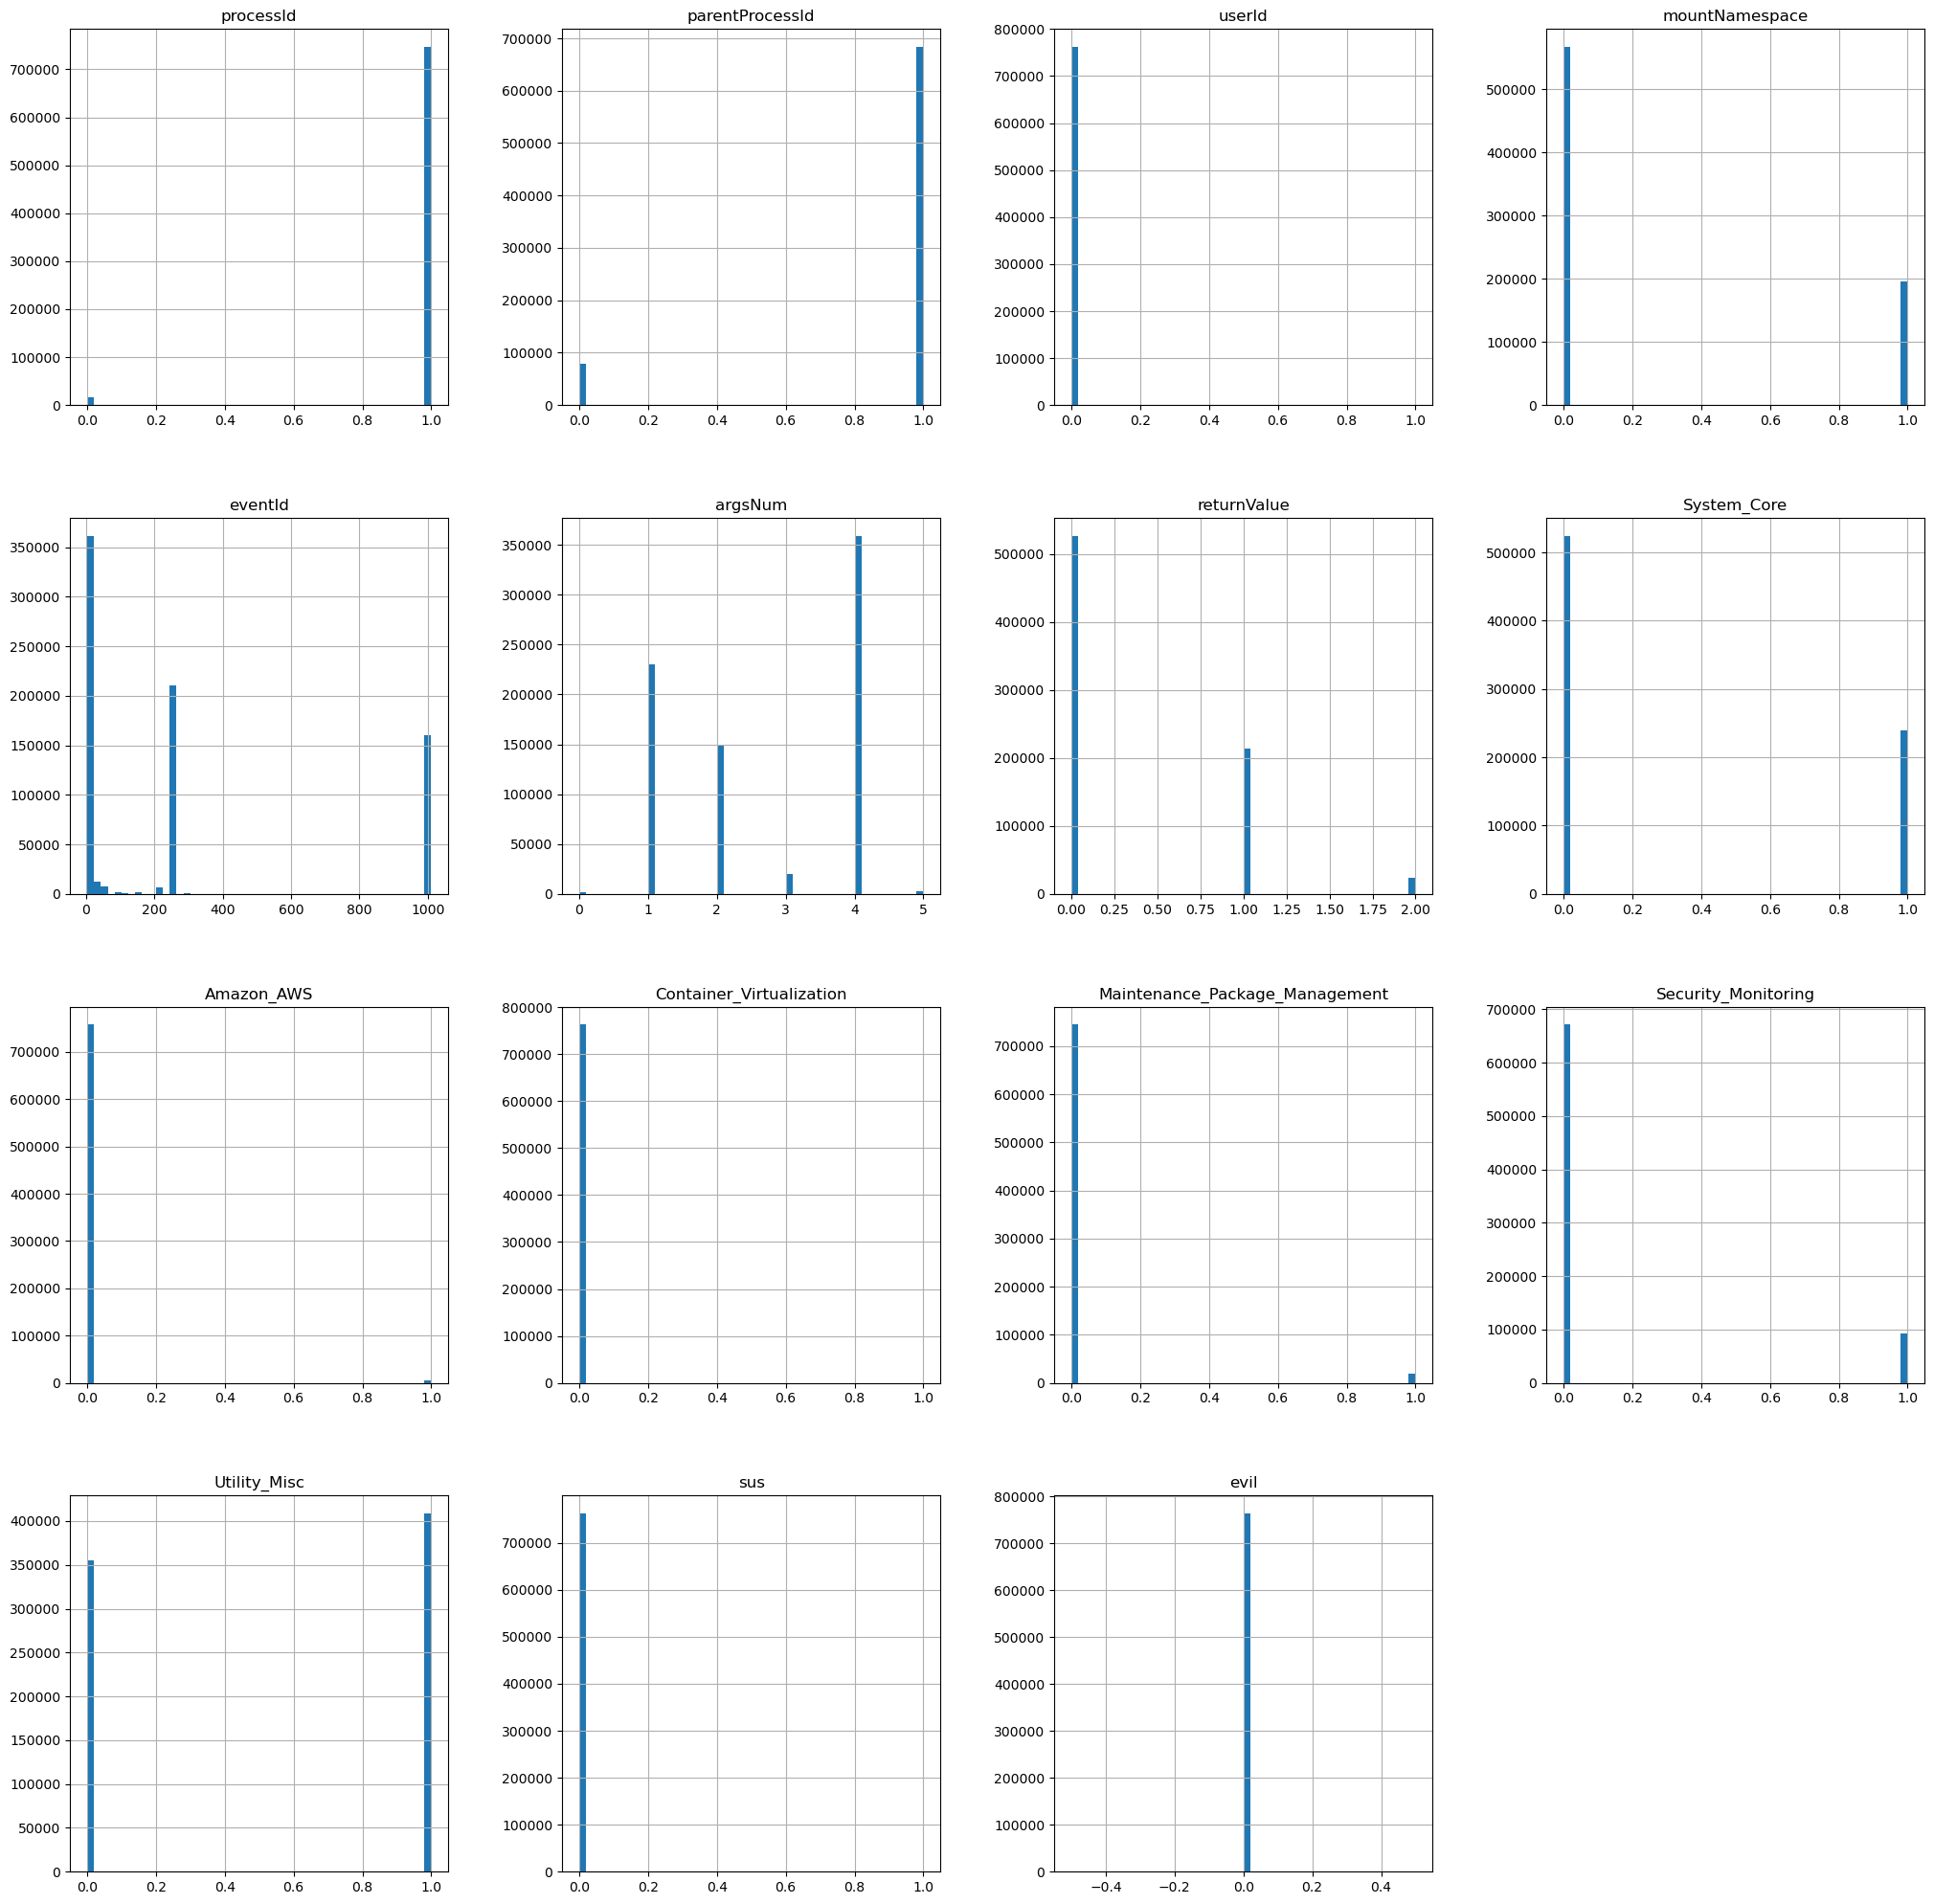

In [27]:
train_df.hist(bins = 50, figsize = (25,25))
plt.show()

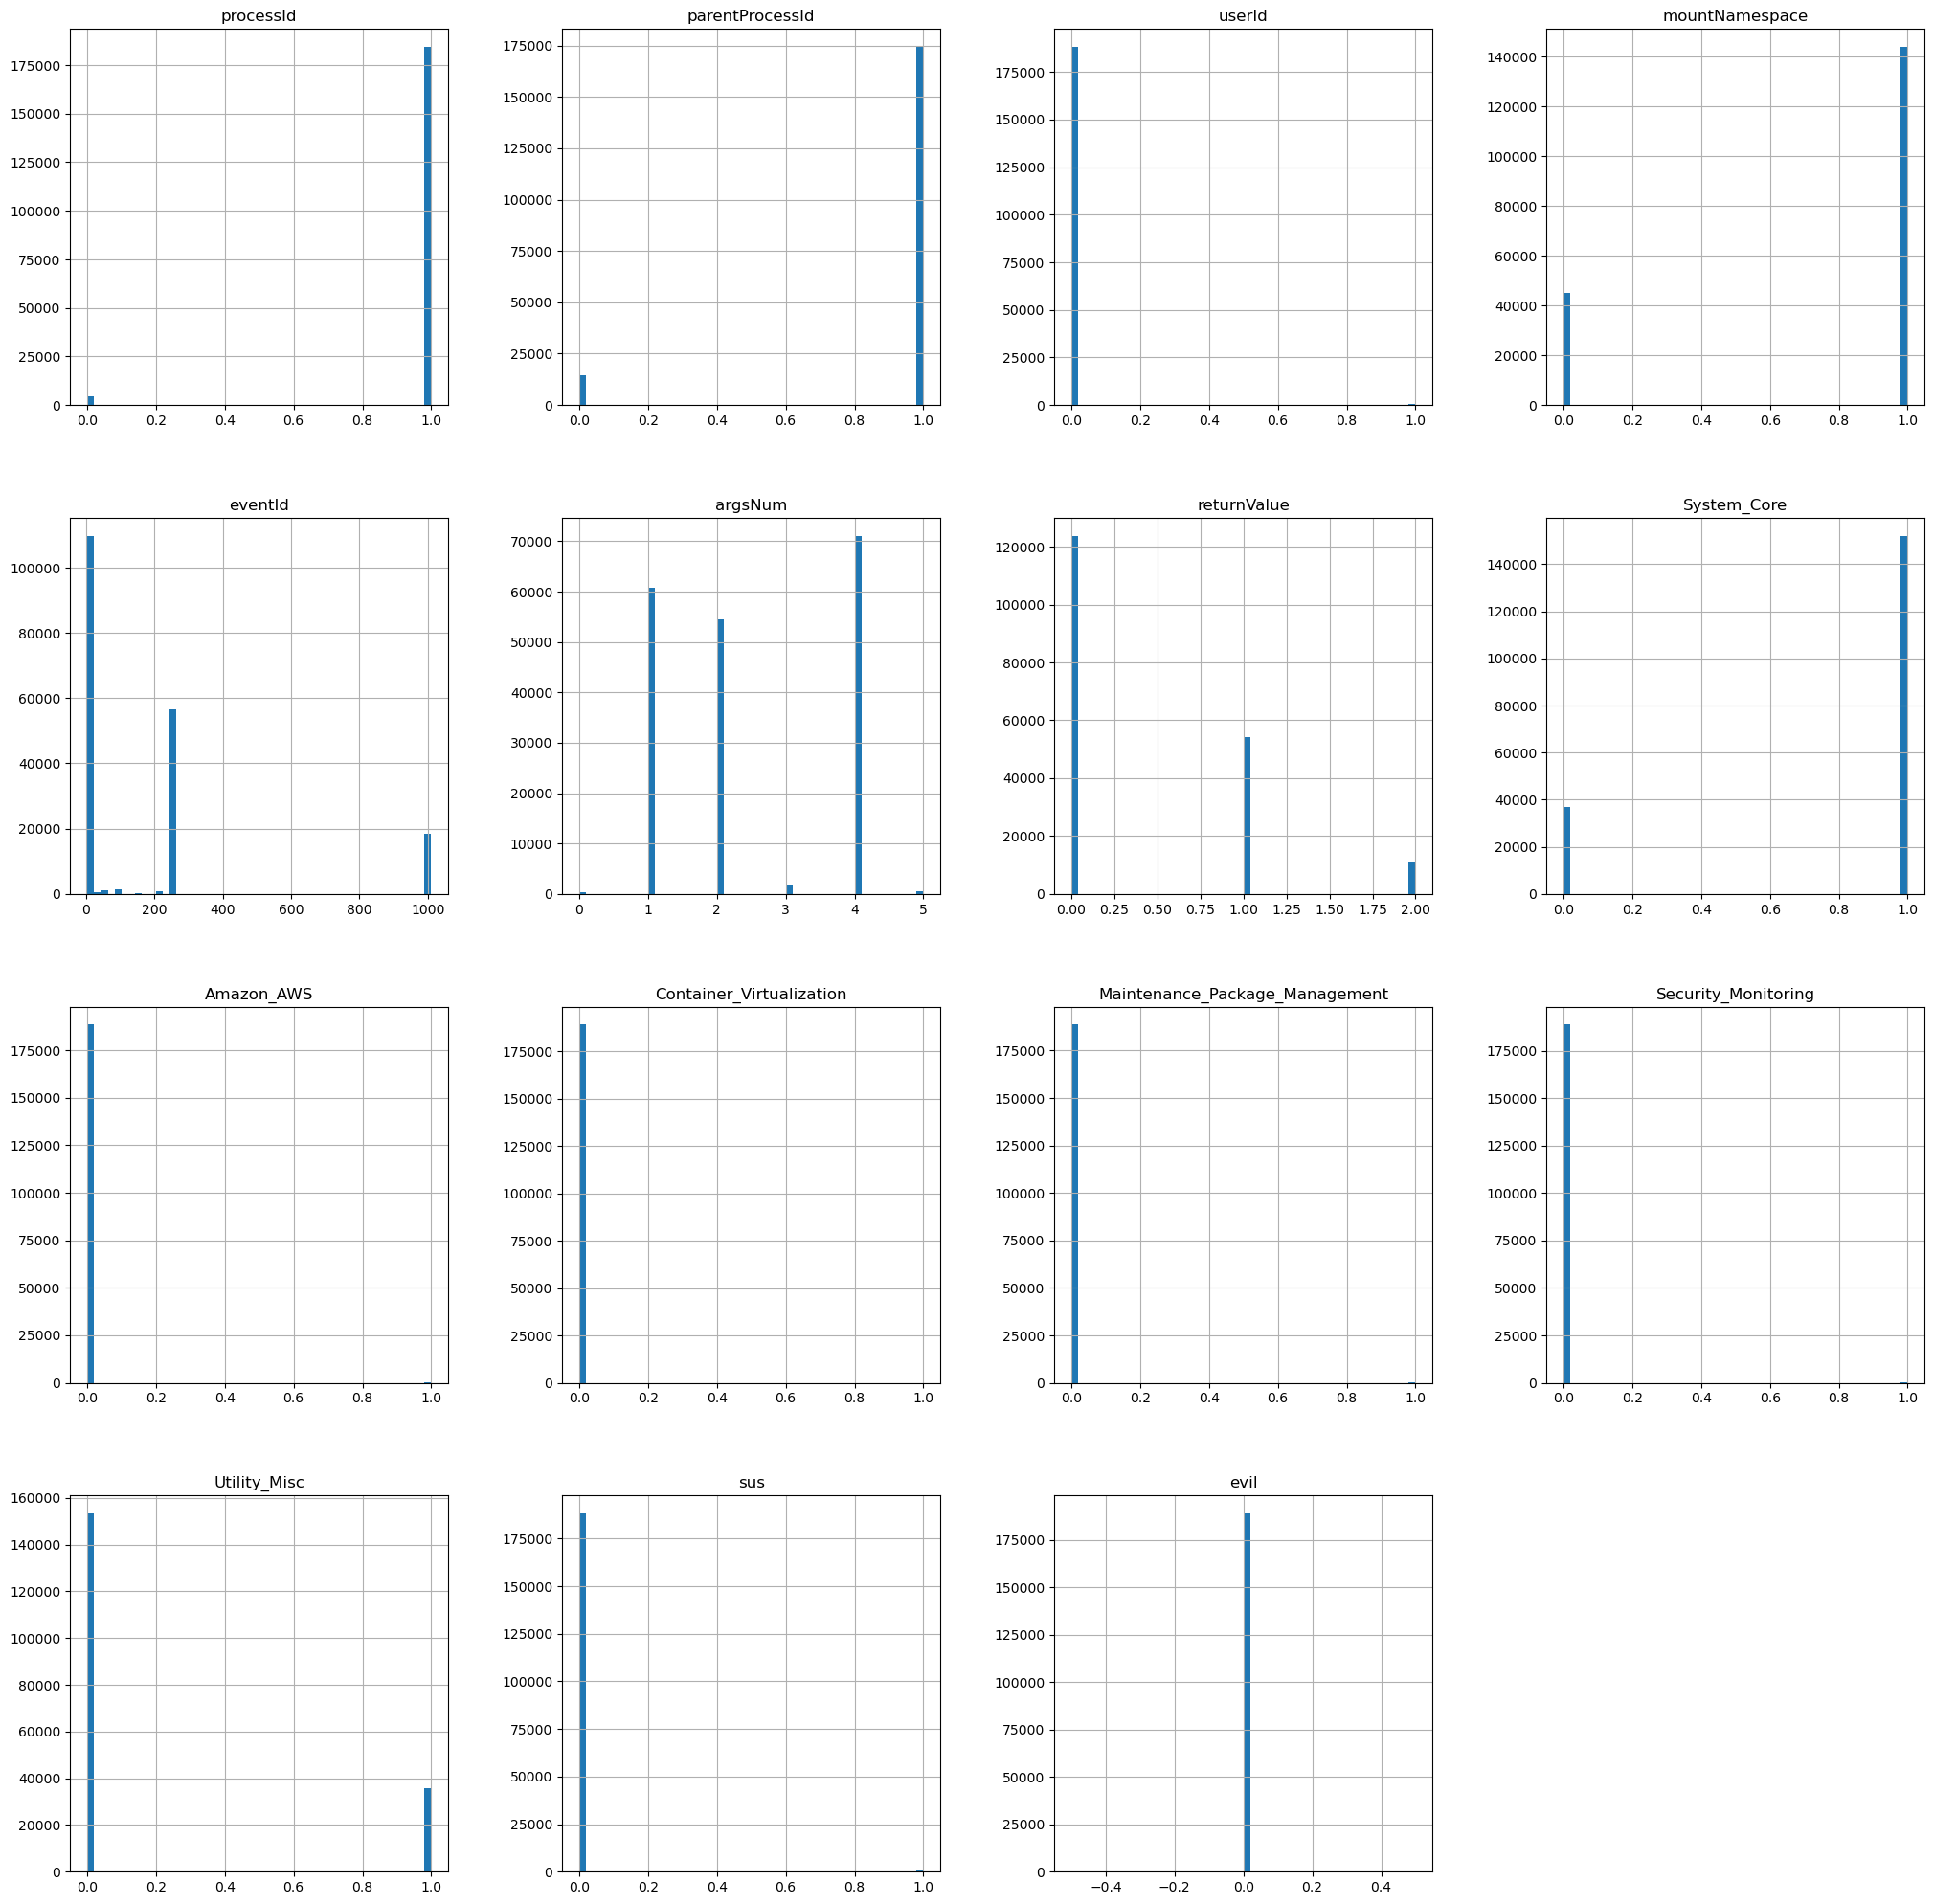

In [28]:
validation_df.hist(bins = 50, figsize = (25,25))
plt.show()

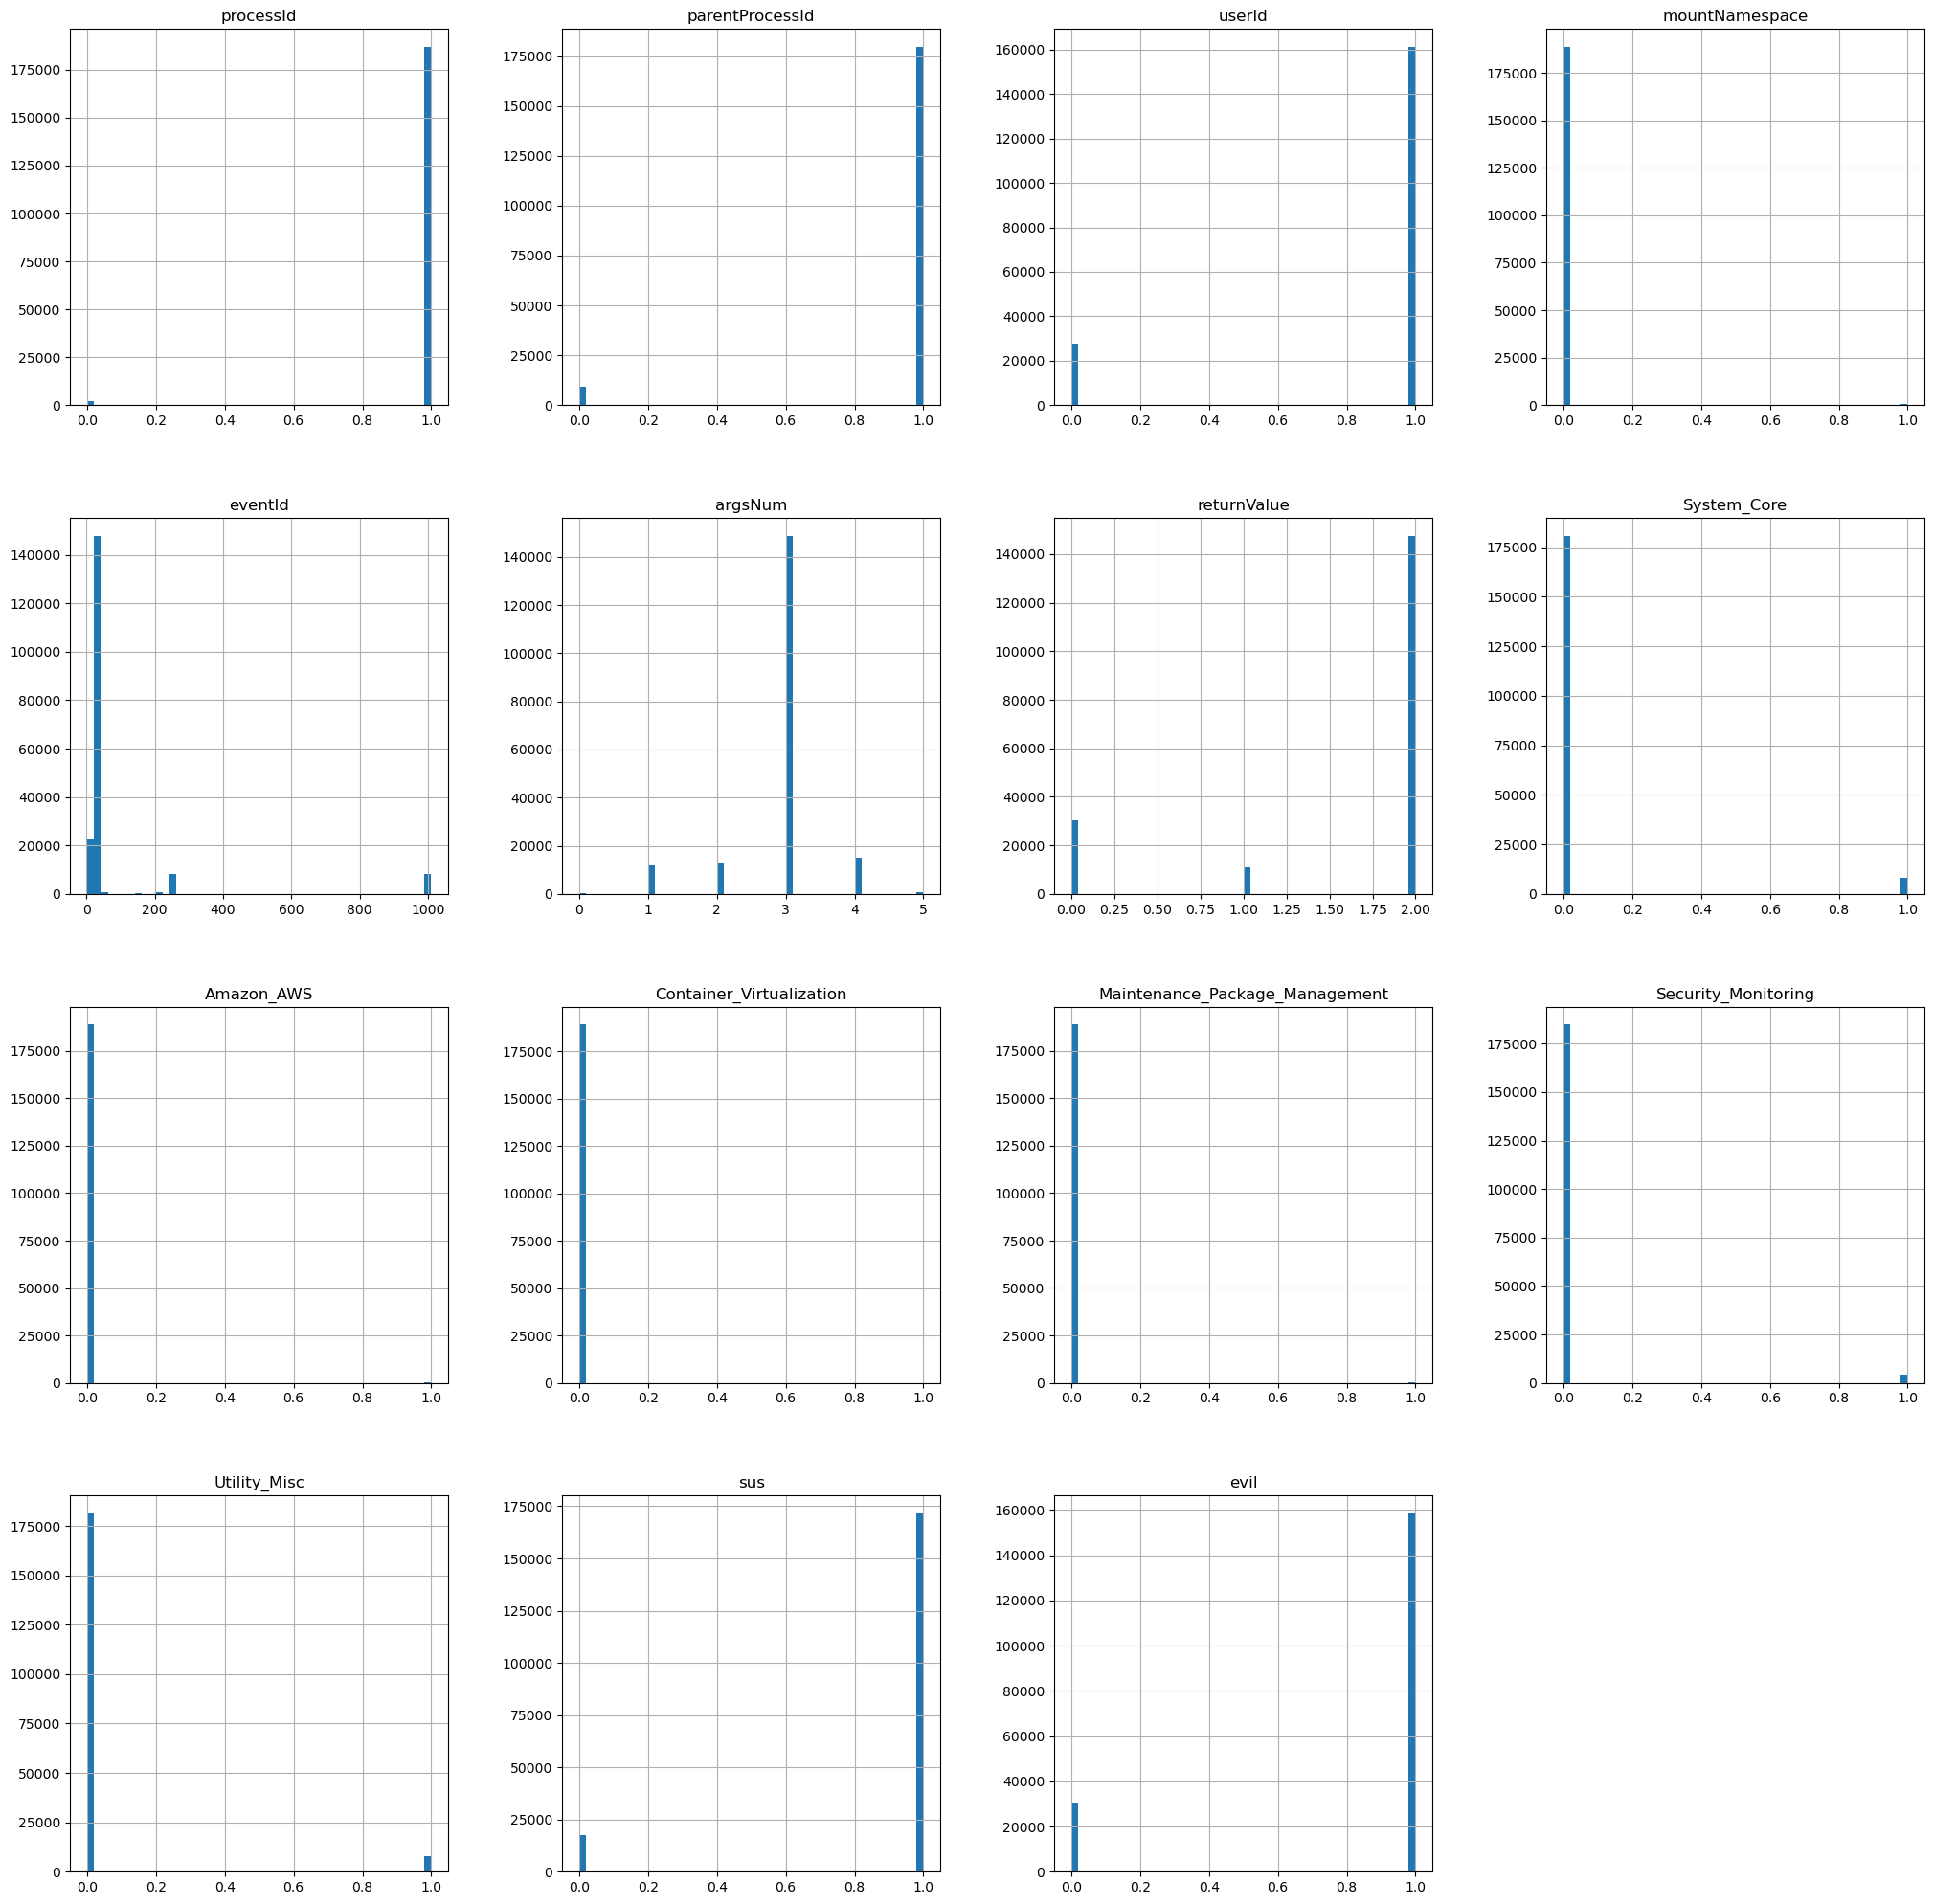

In [29]:
test_df.hist(bins = 50, figsize = (25,25))
plt.show()

In [30]:
benign_train = train_df.loc[train_df['sus'] == 0, :]
benign_train.describe()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,System_Core,Amazon_AWS,Container_Virtualization,Maintenance_Package_Management,Security_Monitoring,Utility_Misc,sus,evil
count,761875.000000,761875.000000,761875.0,761875.000000,761875.000000,761875.000000,761875.000000,761875.000000,761875.000000,761875.000000,761875.000000,761875.000000,761875.000000,761875.0,761875.0
mean,0.978582,0.896944,0.0,0.256751,288.322322,2.672373,0.338982,0.312126,0.007445,0.000020,0.023919,0.120442,0.536049,0.0,0.0
std,0.144774,0.304033,0.0,0.436841,385.213666,1.341081,0.532078,0.463361,0.085961,0.004437,0.152796,0.325478,0.498699,0.0,0.0
min,0.000000,0.000000,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1.000000,1.000000,0.0,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,1.000000,1.000000,0.0,0.000000,62.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0
75%,1.000000,1.000000,0.0,1.000000,257.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0
max,1.000000,1.000000,0.0,1.000000,1010.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


In [31]:
benign_test = test_df.loc[test_df['sus'] == 0, :]
benign_test.describe()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,System_Core,Amazon_AWS,Container_Virtualization,Maintenance_Package_Management,Security_Monitoring,Utility_Misc,sus,evil
count,17508.000000,17508.000000,17508.0,17508.000000,17508.000000,17508.000000,17508.000000,17508.000000,17508.000000,17508.000000,17508.000000,17508.0,17508.000000,17508.0,17508.0
mean,0.881768,0.687000,0.0,0.018906,303.943683,2.635252,0.323052,0.258625,0.006283,0.000114,0.006283,0.0,0.407128,0.0,0.0
std,0.322891,0.463728,0.0,0.136196,401.915892,1.313026,0.557476,0.437891,0.079017,0.010688,0.079017,0.0,0.491313,0.0,0.0
min,0.000000,0.000000,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
25%,1.000000,0.000000,0.0,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
50%,1.000000,1.000000,0.0,0.000000,59.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
75%,1.000000,1.000000,0.0,0.000000,257.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0
max,1.000000,1.000000,0.0,1.000000,1010.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0


In [32]:
benign_val = validation_df.loc[validation_df['sus'] == 0, :]
benign_val.describe()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,System_Core,Amazon_AWS,Container_Virtualization,Maintenance_Package_Management,Security_Monitoring,Utility_Misc,sus,evil
count,188181.000000,188181.000000,188181.0,188181.000000,188181.000000,188181.000000,188181.000000,188181.000000,188181.000000,188181.000000,188181.000000,188181.000000,188181.000000,188181.0,188181.0
mean,0.975694,0.926417,0.0,0.765019,180.432360,2.446501,0.401039,0.804034,0.002646,0.000064,0.001897,0.001180,0.189642,0.0,0.0
std,0.153999,0.261092,0.0,0.423988,293.161034,1.293571,0.594955,0.396943,0.051375,0.007985,0.043515,0.034327,0.392019,0.0,0.0
min,0.000000,0.000000,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1.000000,1.000000,0.0,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,1.000000,1.000000,0.0,1.000000,6.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,1.000000,1.000000,0.0,1.000000,257.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,0.0,1.000000,1010.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


In [33]:
evil_train = train_df.loc[train_df['sus'] == 1, :]
evil_train.describe()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,System_Core,Amazon_AWS,Container_Virtualization,Maintenance_Package_Management,Security_Monitoring,Utility_Misc,sus,evil
count,1269.0,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.0,1269.0,1269.000000,1269.0,1269.000000,1269.0,1269.0
mean,1.0,0.182033,0.784870,0.028369,190.076438,2.497242,0.960599,0.813239,0.0,0.0,0.092987,0.0,0.093775,1.0,0.0
std,0.0,0.386024,0.411075,0.166090,307.257611,1.219337,0.942357,0.389873,0.0,0.0,0.290528,0.0,0.291630,0.0,0.0
min,1.0,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0
25%,1.0,0.000000,1.000000,0.000000,4.000000,2.000000,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0
50%,1.0,0.000000,1.000000,0.000000,6.000000,2.000000,1.000000,1.000000,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0
75%,1.0,0.000000,1.000000,0.000000,257.000000,4.000000,2.000000,1.000000,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0
max,1.0,1.000000,1.000000,1.000000,1010.000000,5.000000,2.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.0,0.0


In [34]:
evil_val = validation_df.loc[validation_df['sus'] == 1, :]
evil_val.describe()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,System_Core,Amazon_AWS,Container_Virtualization,Maintenance_Package_Management,Security_Monitoring,Utility_Misc,sus,evil
count,786.0,786.000000,786.00000,786.0,786.000000,786.000000,786.000000,786.000000,786.0,786.0,786.0,786.000000,786.0,786.0,786.0
mean,1.0,0.038168,0.98855,0.0,170.151399,2.428753,1.049618,0.950382,0.0,0.0,0.0,0.038168,0.0,1.0,0.0
std,0.0,0.191724,0.10646,0.0,282.214665,1.184029,0.954416,0.217293,0.0,0.0,0.0,0.191724,0.0,0.0,0.0
min,1.0,0.000000,0.00000,0.0,3.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
25%,1.0,0.000000,1.00000,0.0,4.000000,2.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
50%,1.0,0.000000,1.00000,0.0,6.000000,2.000000,1.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
75%,1.0,0.000000,1.00000,0.0,257.000000,4.000000,2.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
max,1.0,1.000000,1.00000,0.0,1010.000000,4.000000,2.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,1.0,0.0


In [35]:
evil_test = test_df.loc[test_df['sus'] == 1, :]
evil_test.describe()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,System_Core,Amazon_AWS,Container_Virtualization,Maintenance_Package_Management,Security_Monitoring,Utility_Misc,sus,evil
count,171459.0,171459.000000,171459.000000,171459.0,171459.000000,171459.000000,171459.000000,171459.000000,171459.0,171459.0,171459.000000,171459.000000,171459.000000,171459.0,171459.000000
mean,1.0,0.977406,0.940464,0.0,66.833698,2.921048,1.753177,0.021632,0.0,0.0,0.000192,0.024070,0.003342,1.0,0.924023
std,0.0,0.148607,0.236626,0.0,148.330638,0.514894,0.625609,0.145479,0.0,0.0,0.013872,0.153267,0.057713,0.0,0.264963
min,1.0,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000
25%,1.0,1.000000,1.000000,0.0,42.000000,3.000000,2.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.000000
50%,1.0,1.000000,1.000000,0.0,42.000000,3.000000,2.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.000000
75%,1.0,1.000000,1.000000,0.0,42.000000,3.000000,2.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.000000
max,1.0,1.000000,1.000000,0.0,1010.000000,5.000000,2.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.0,1.000000


Lets see the overlap

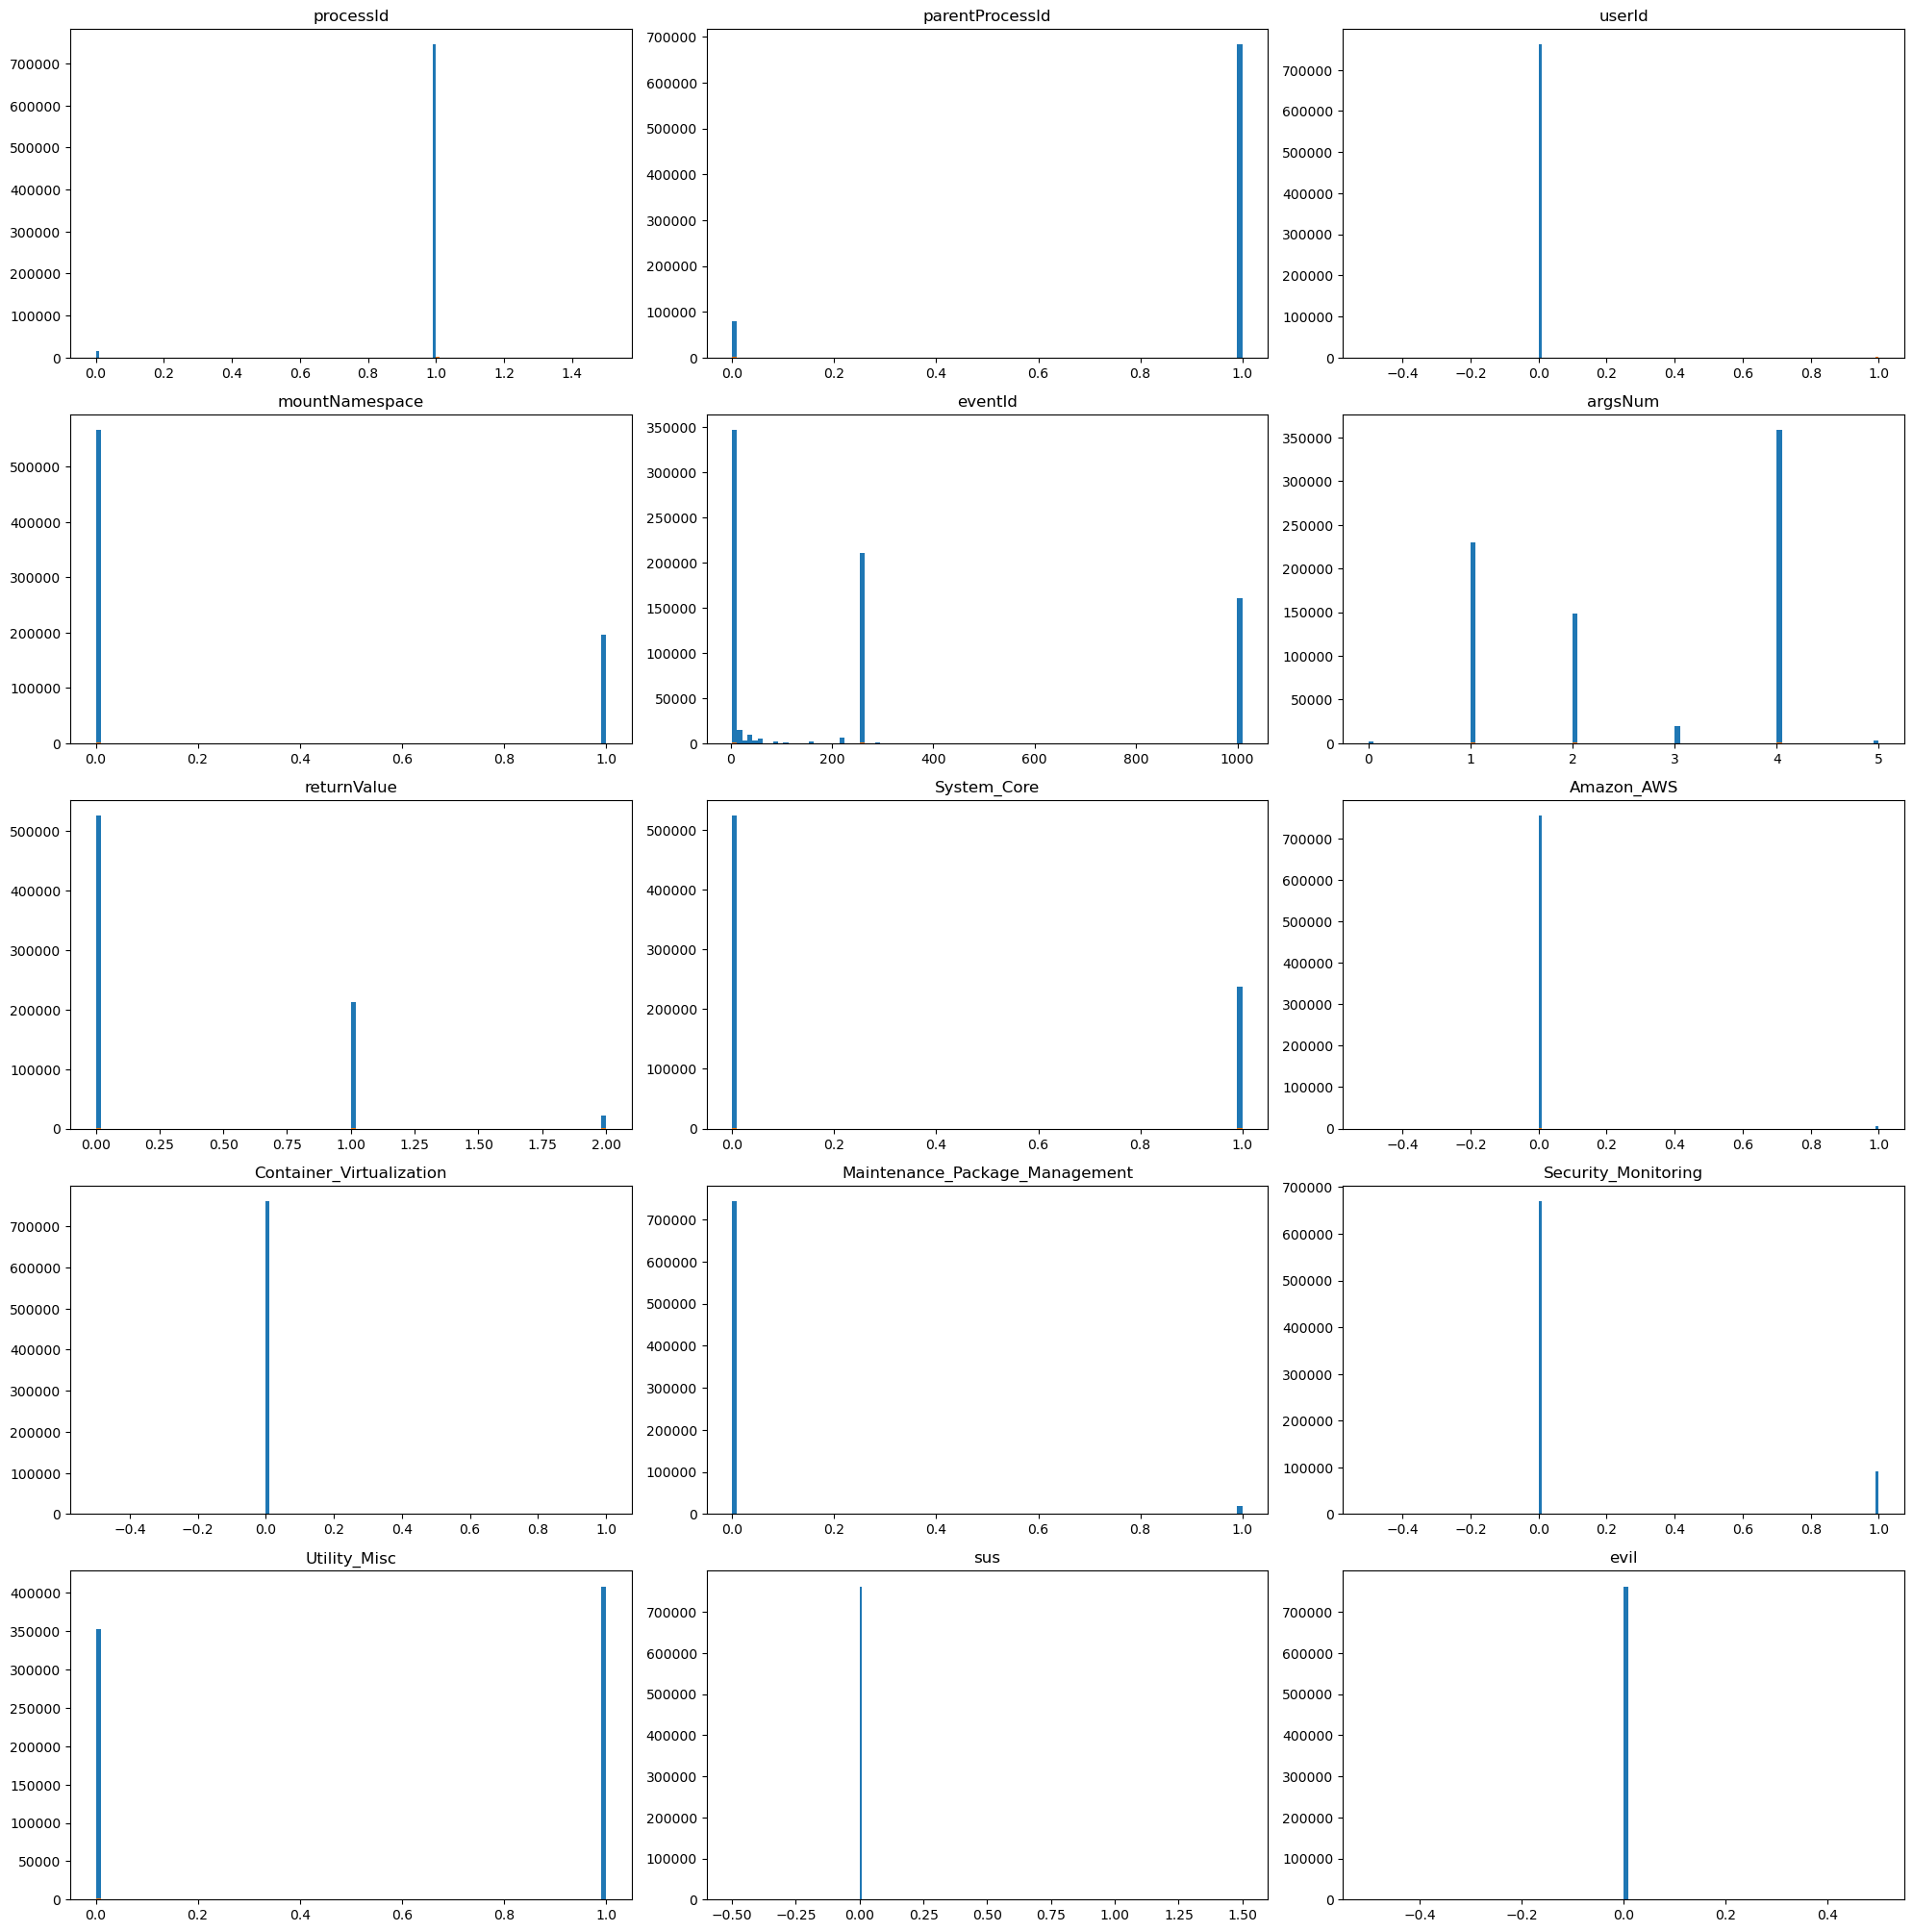

In [36]:
plt.figure(figsize=(20,40))
num=1
for col in benign_train.columns:
    plt.subplot(10,3,num)
    plt.hist(benign_train[col], bins = 100)
    plt.hist(evil_train[col],bins = 100)
    plt.title(col)
    num=num+1
plt.tight_layout()
plt.show()

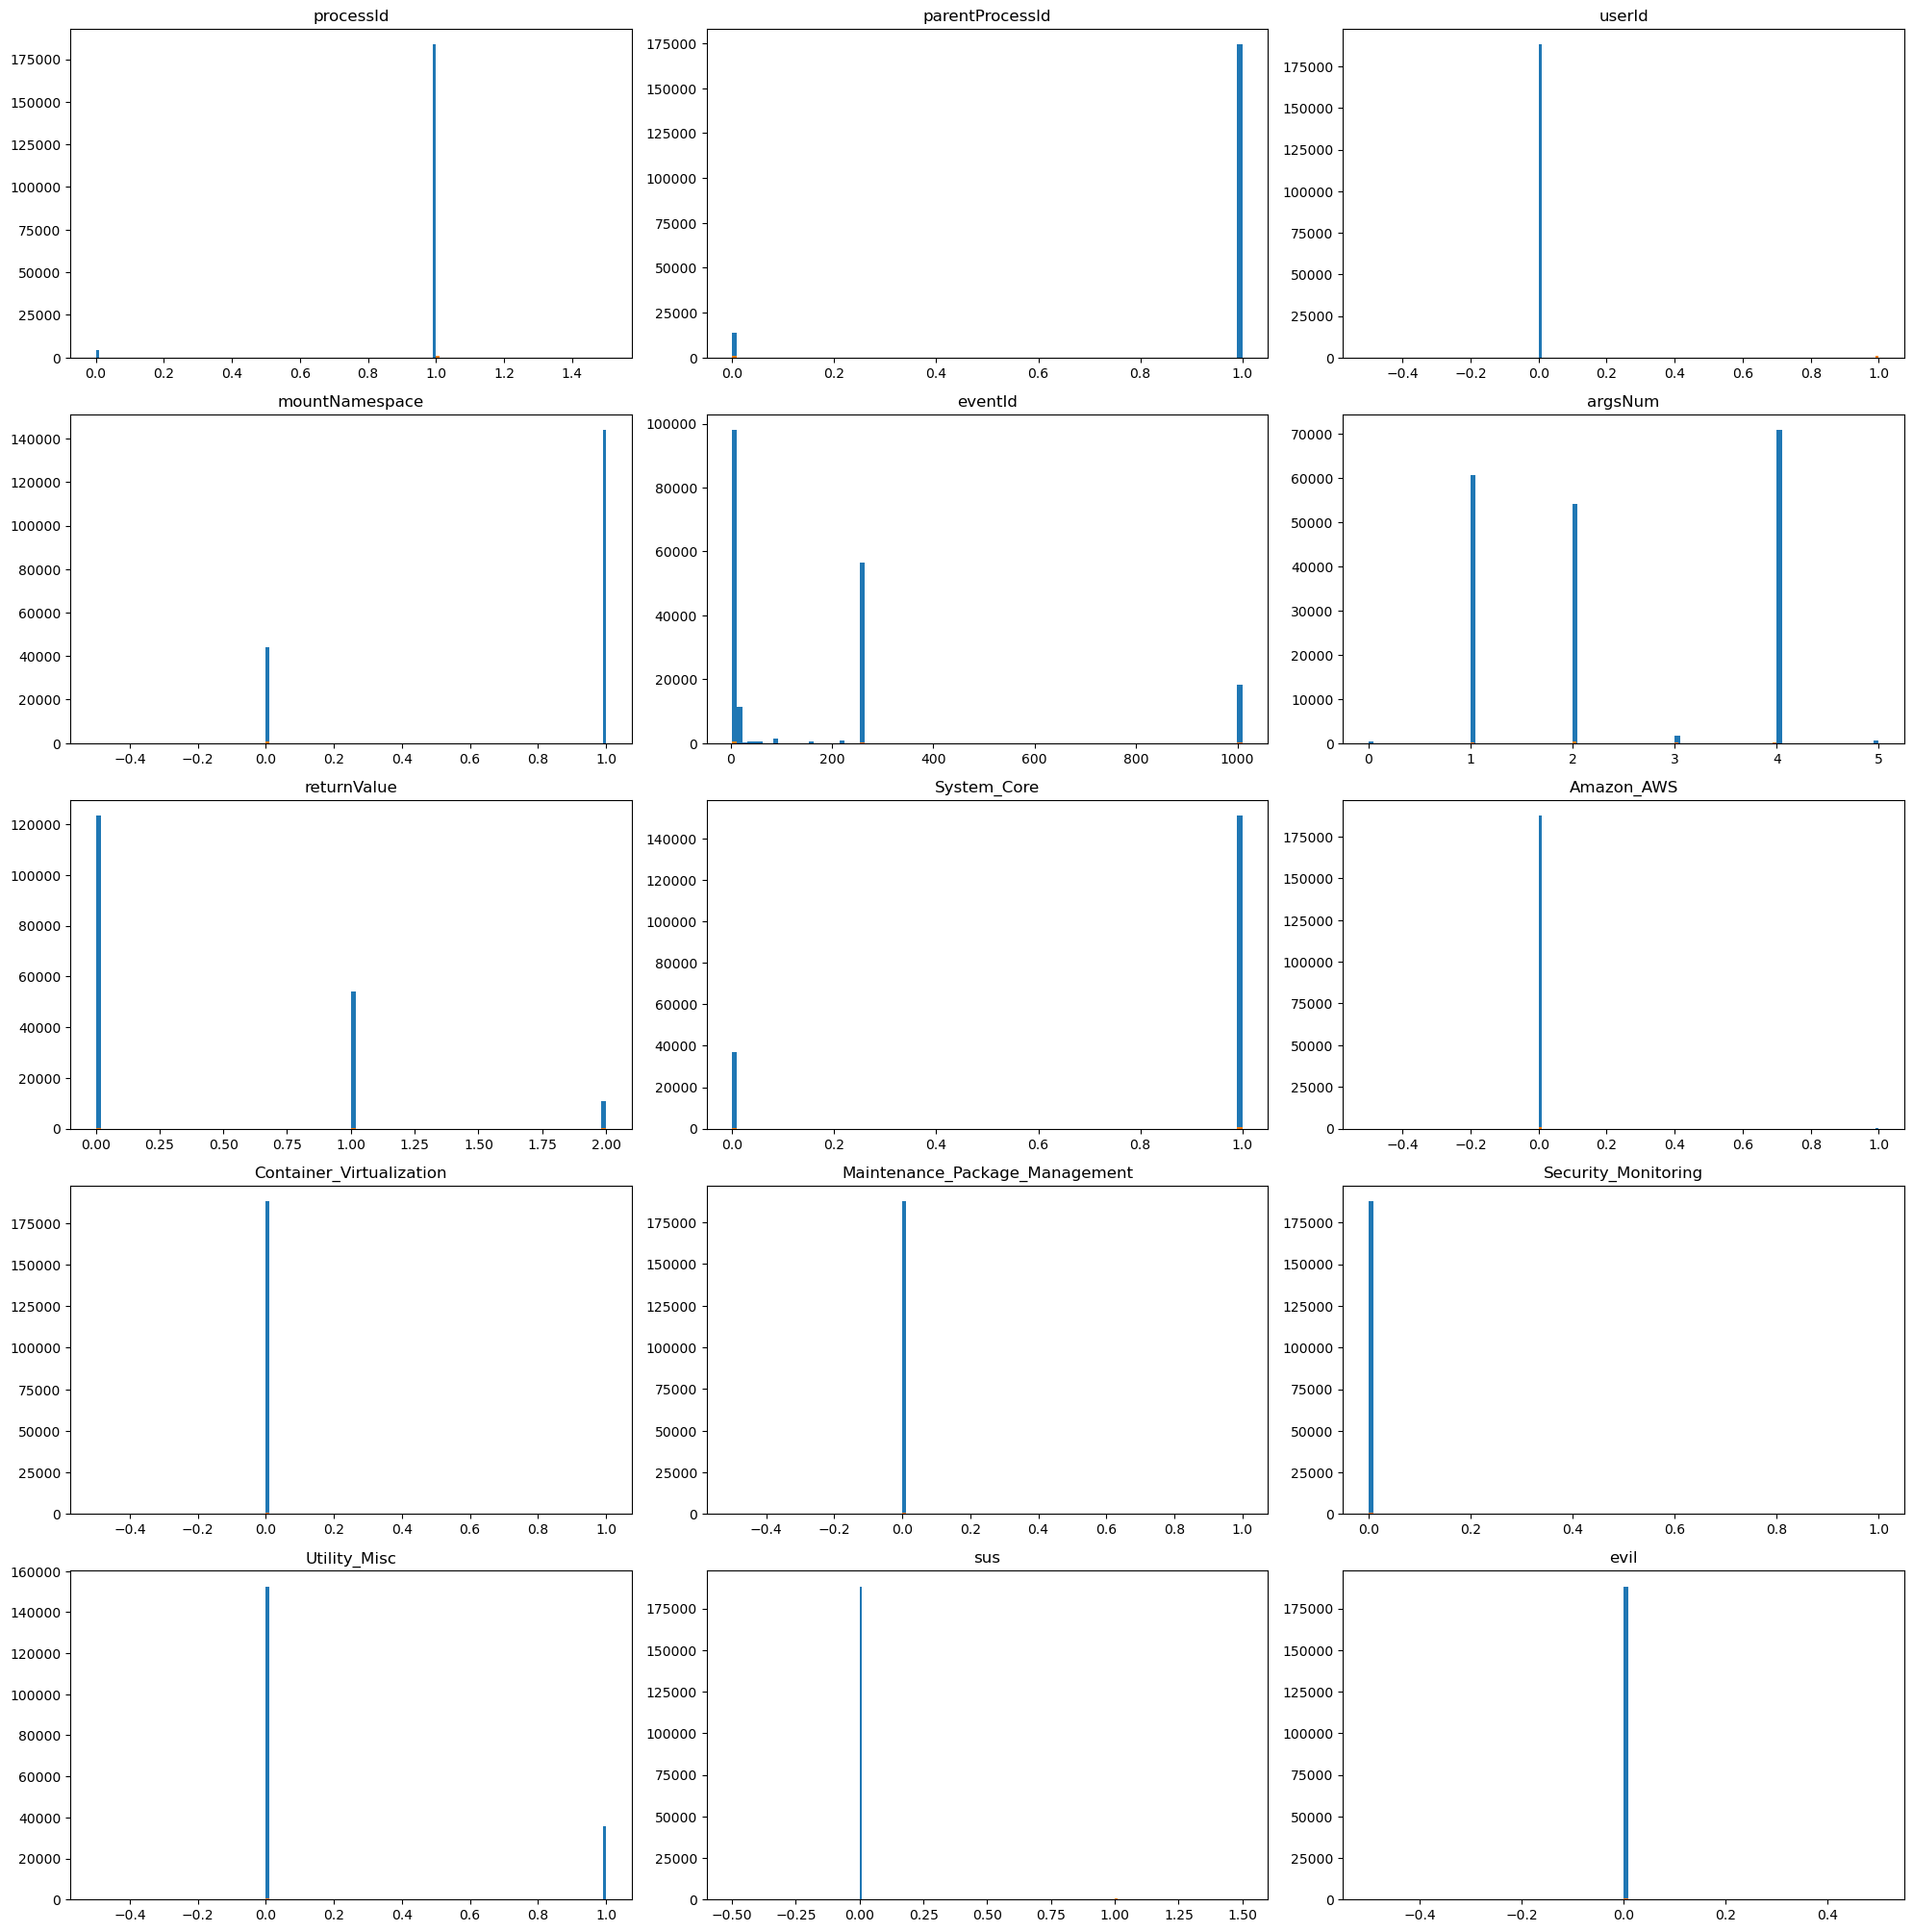

In [37]:
plt.figure(figsize=(20,40))
num=1
for col in benign_val.columns:
    plt.subplot(10,3,num)
    plt.hist(benign_val[col], bins = 100)
    plt.hist(evil_val[col],bins = 100)
    plt.title(col)
    num=num+1
plt.tight_layout()
plt.show()

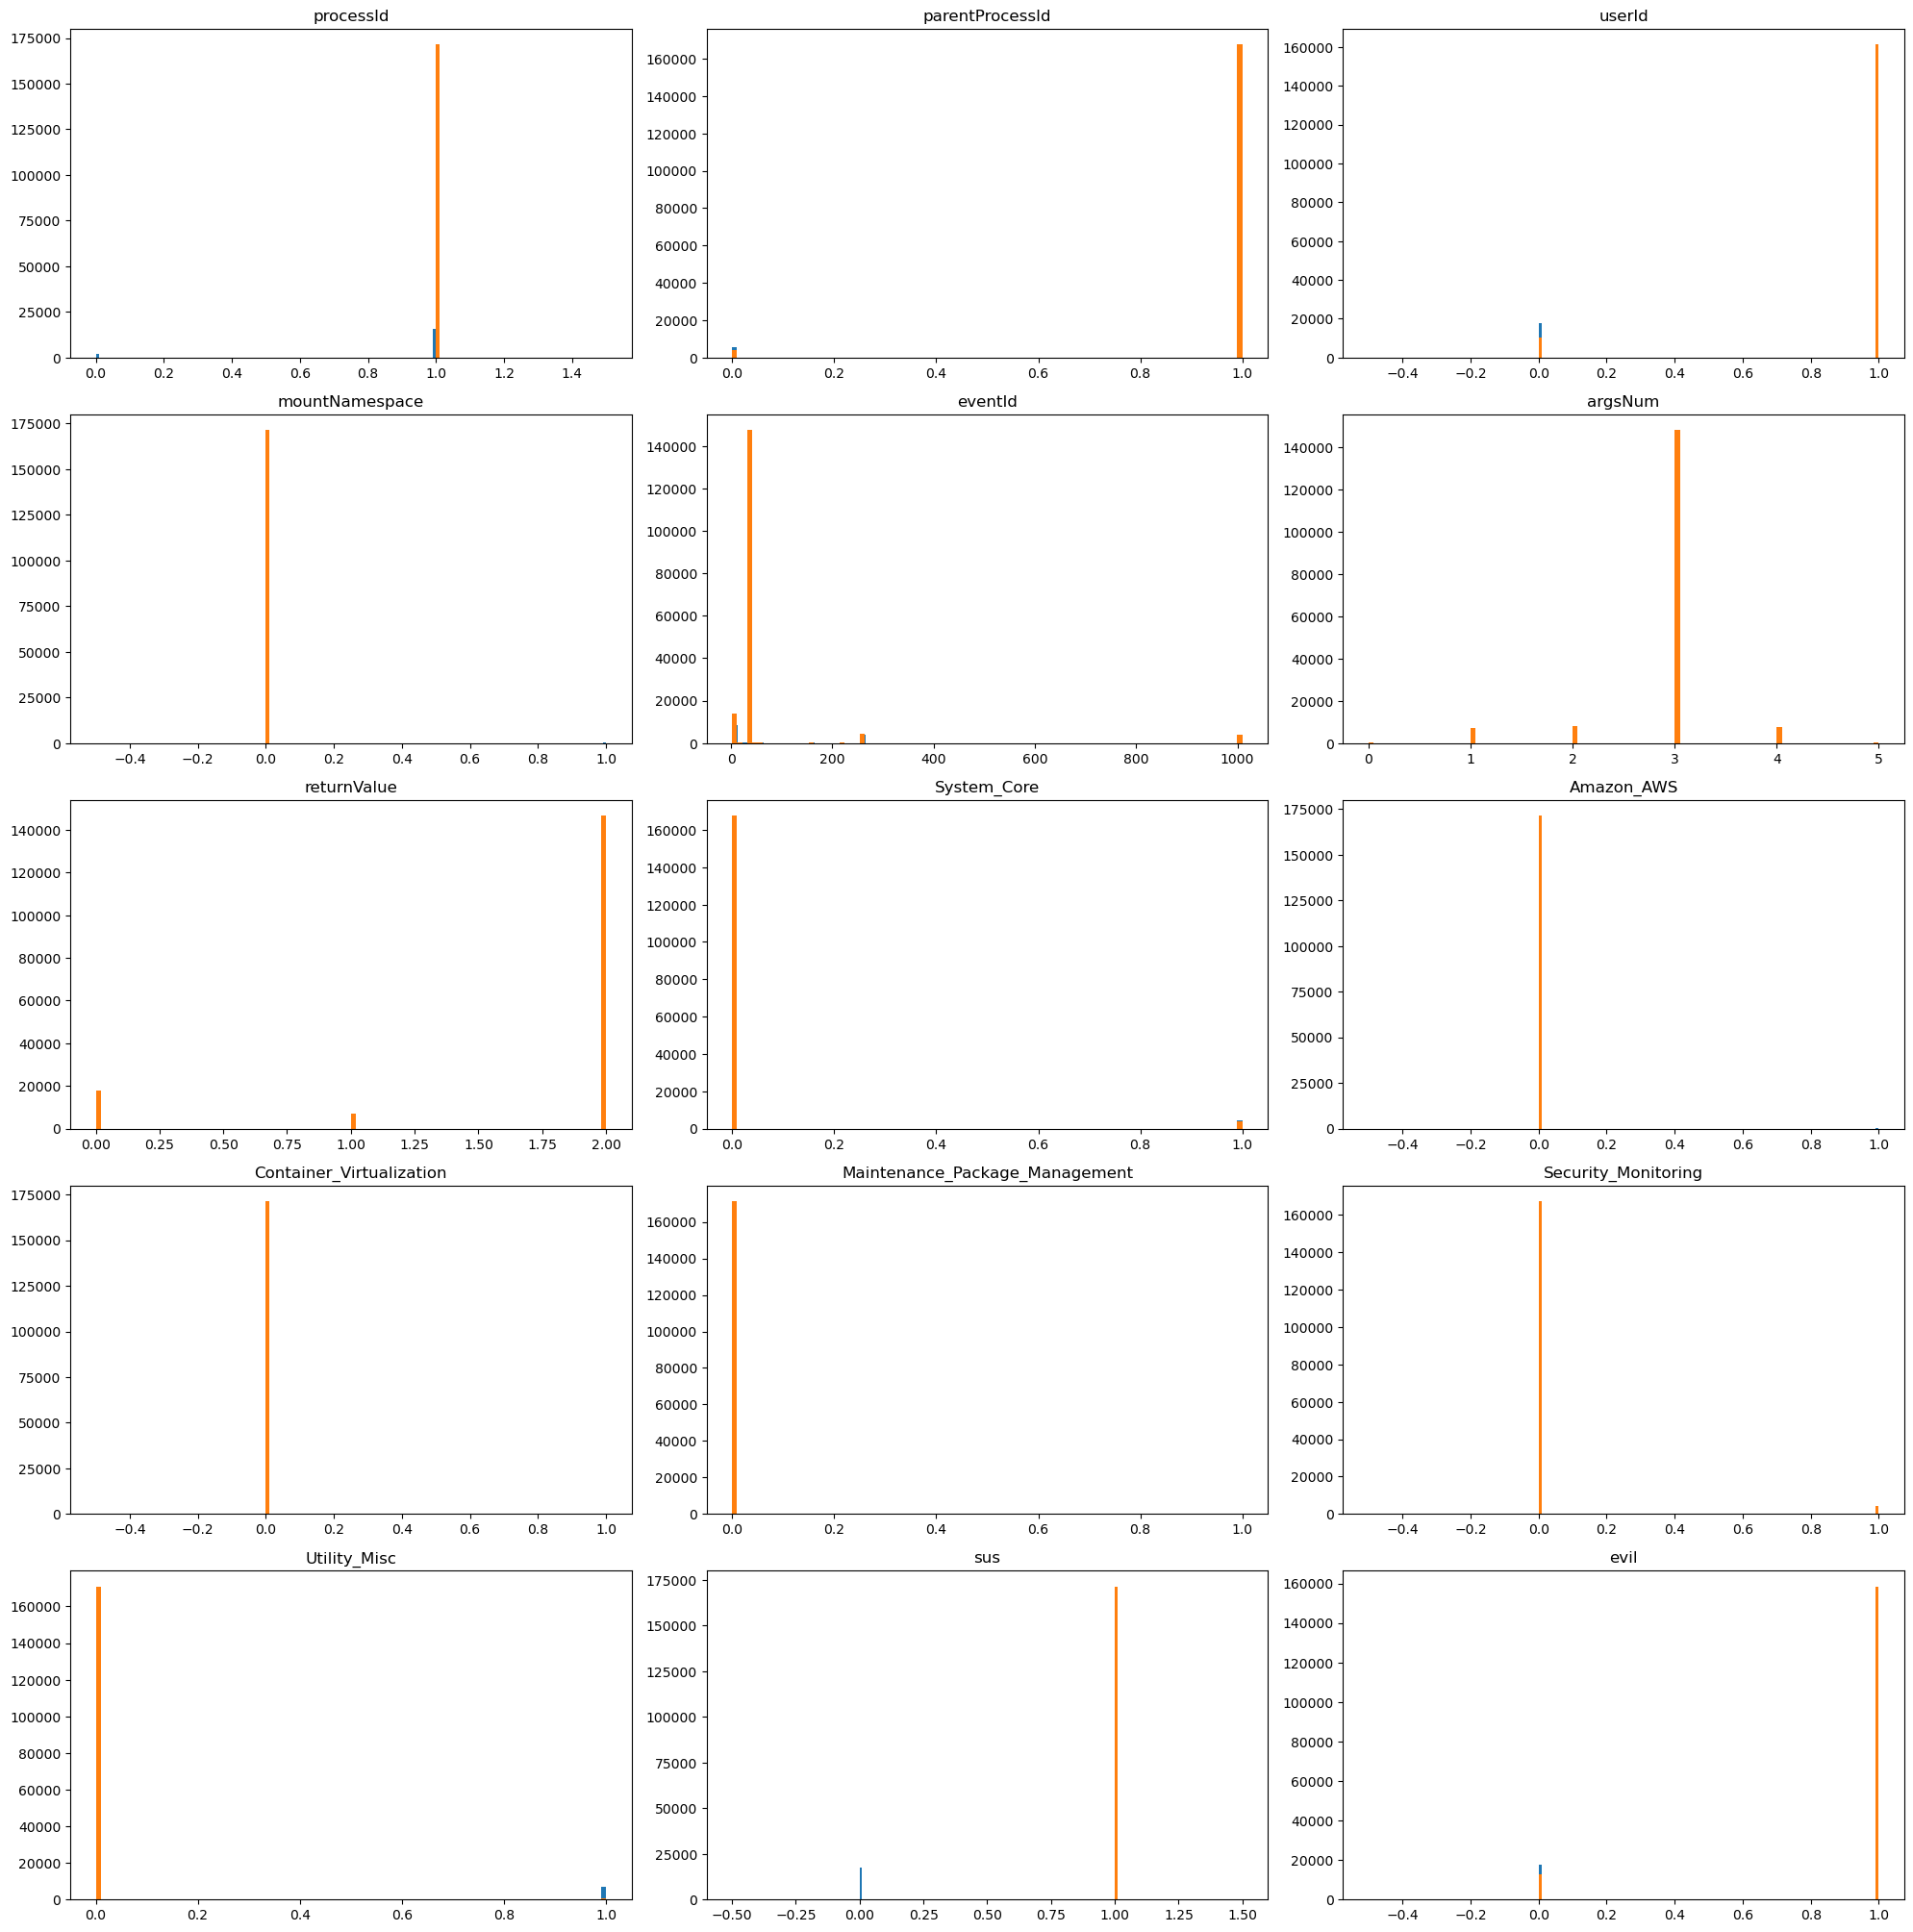

In [38]:
plt.figure(figsize=(20,40))
num=1
for col in benign_test.columns:
    plt.subplot(10,3,num)
    plt.hist(benign_test[col], bins = 100)
    plt.hist(evil_test[col],bins = 100)
    plt.title(col)
    num=num+1
plt.tight_layout()
plt.show()

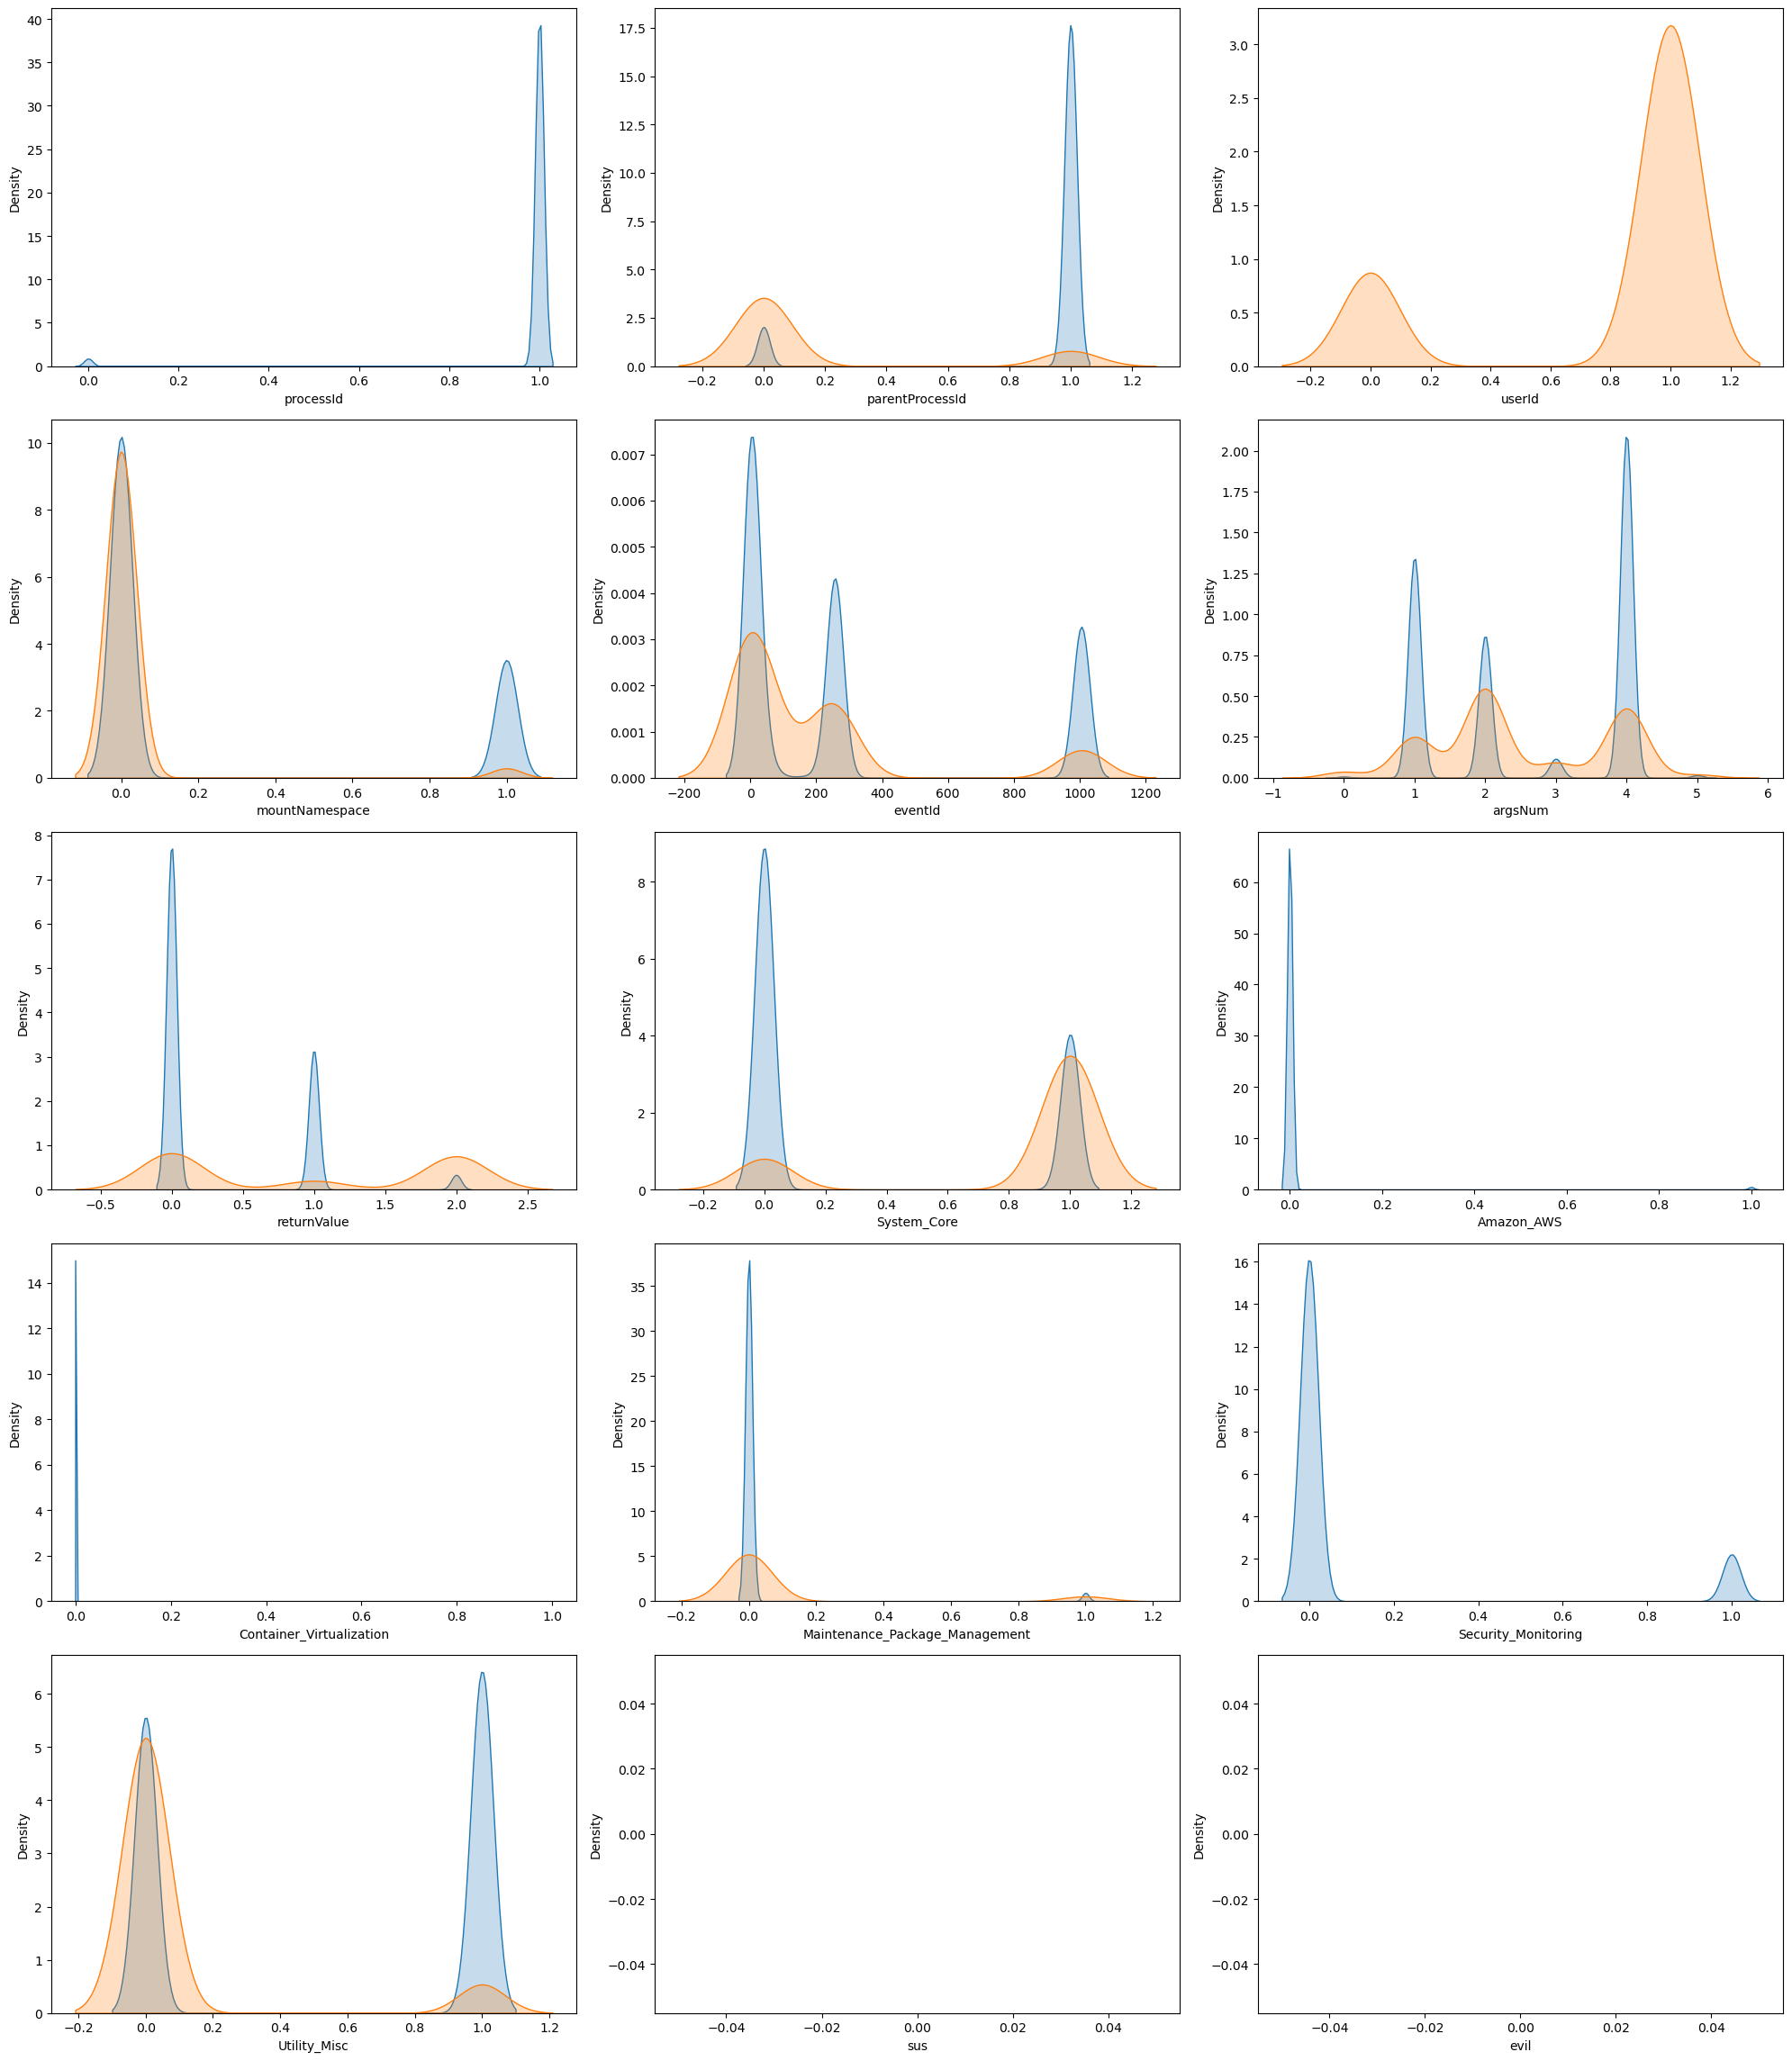

In [39]:
features = train_df.columns

plt.figure(figsize=(20,50))
num=1
for feature in features:
    plt.subplot(11,3,num)
    sns.kdeplot(benign_train[feature], shade= True)
    sns.kdeplot(evil_train[feature], shade= True)
    num=num+1
    plt.tight_layout()
plt.show()

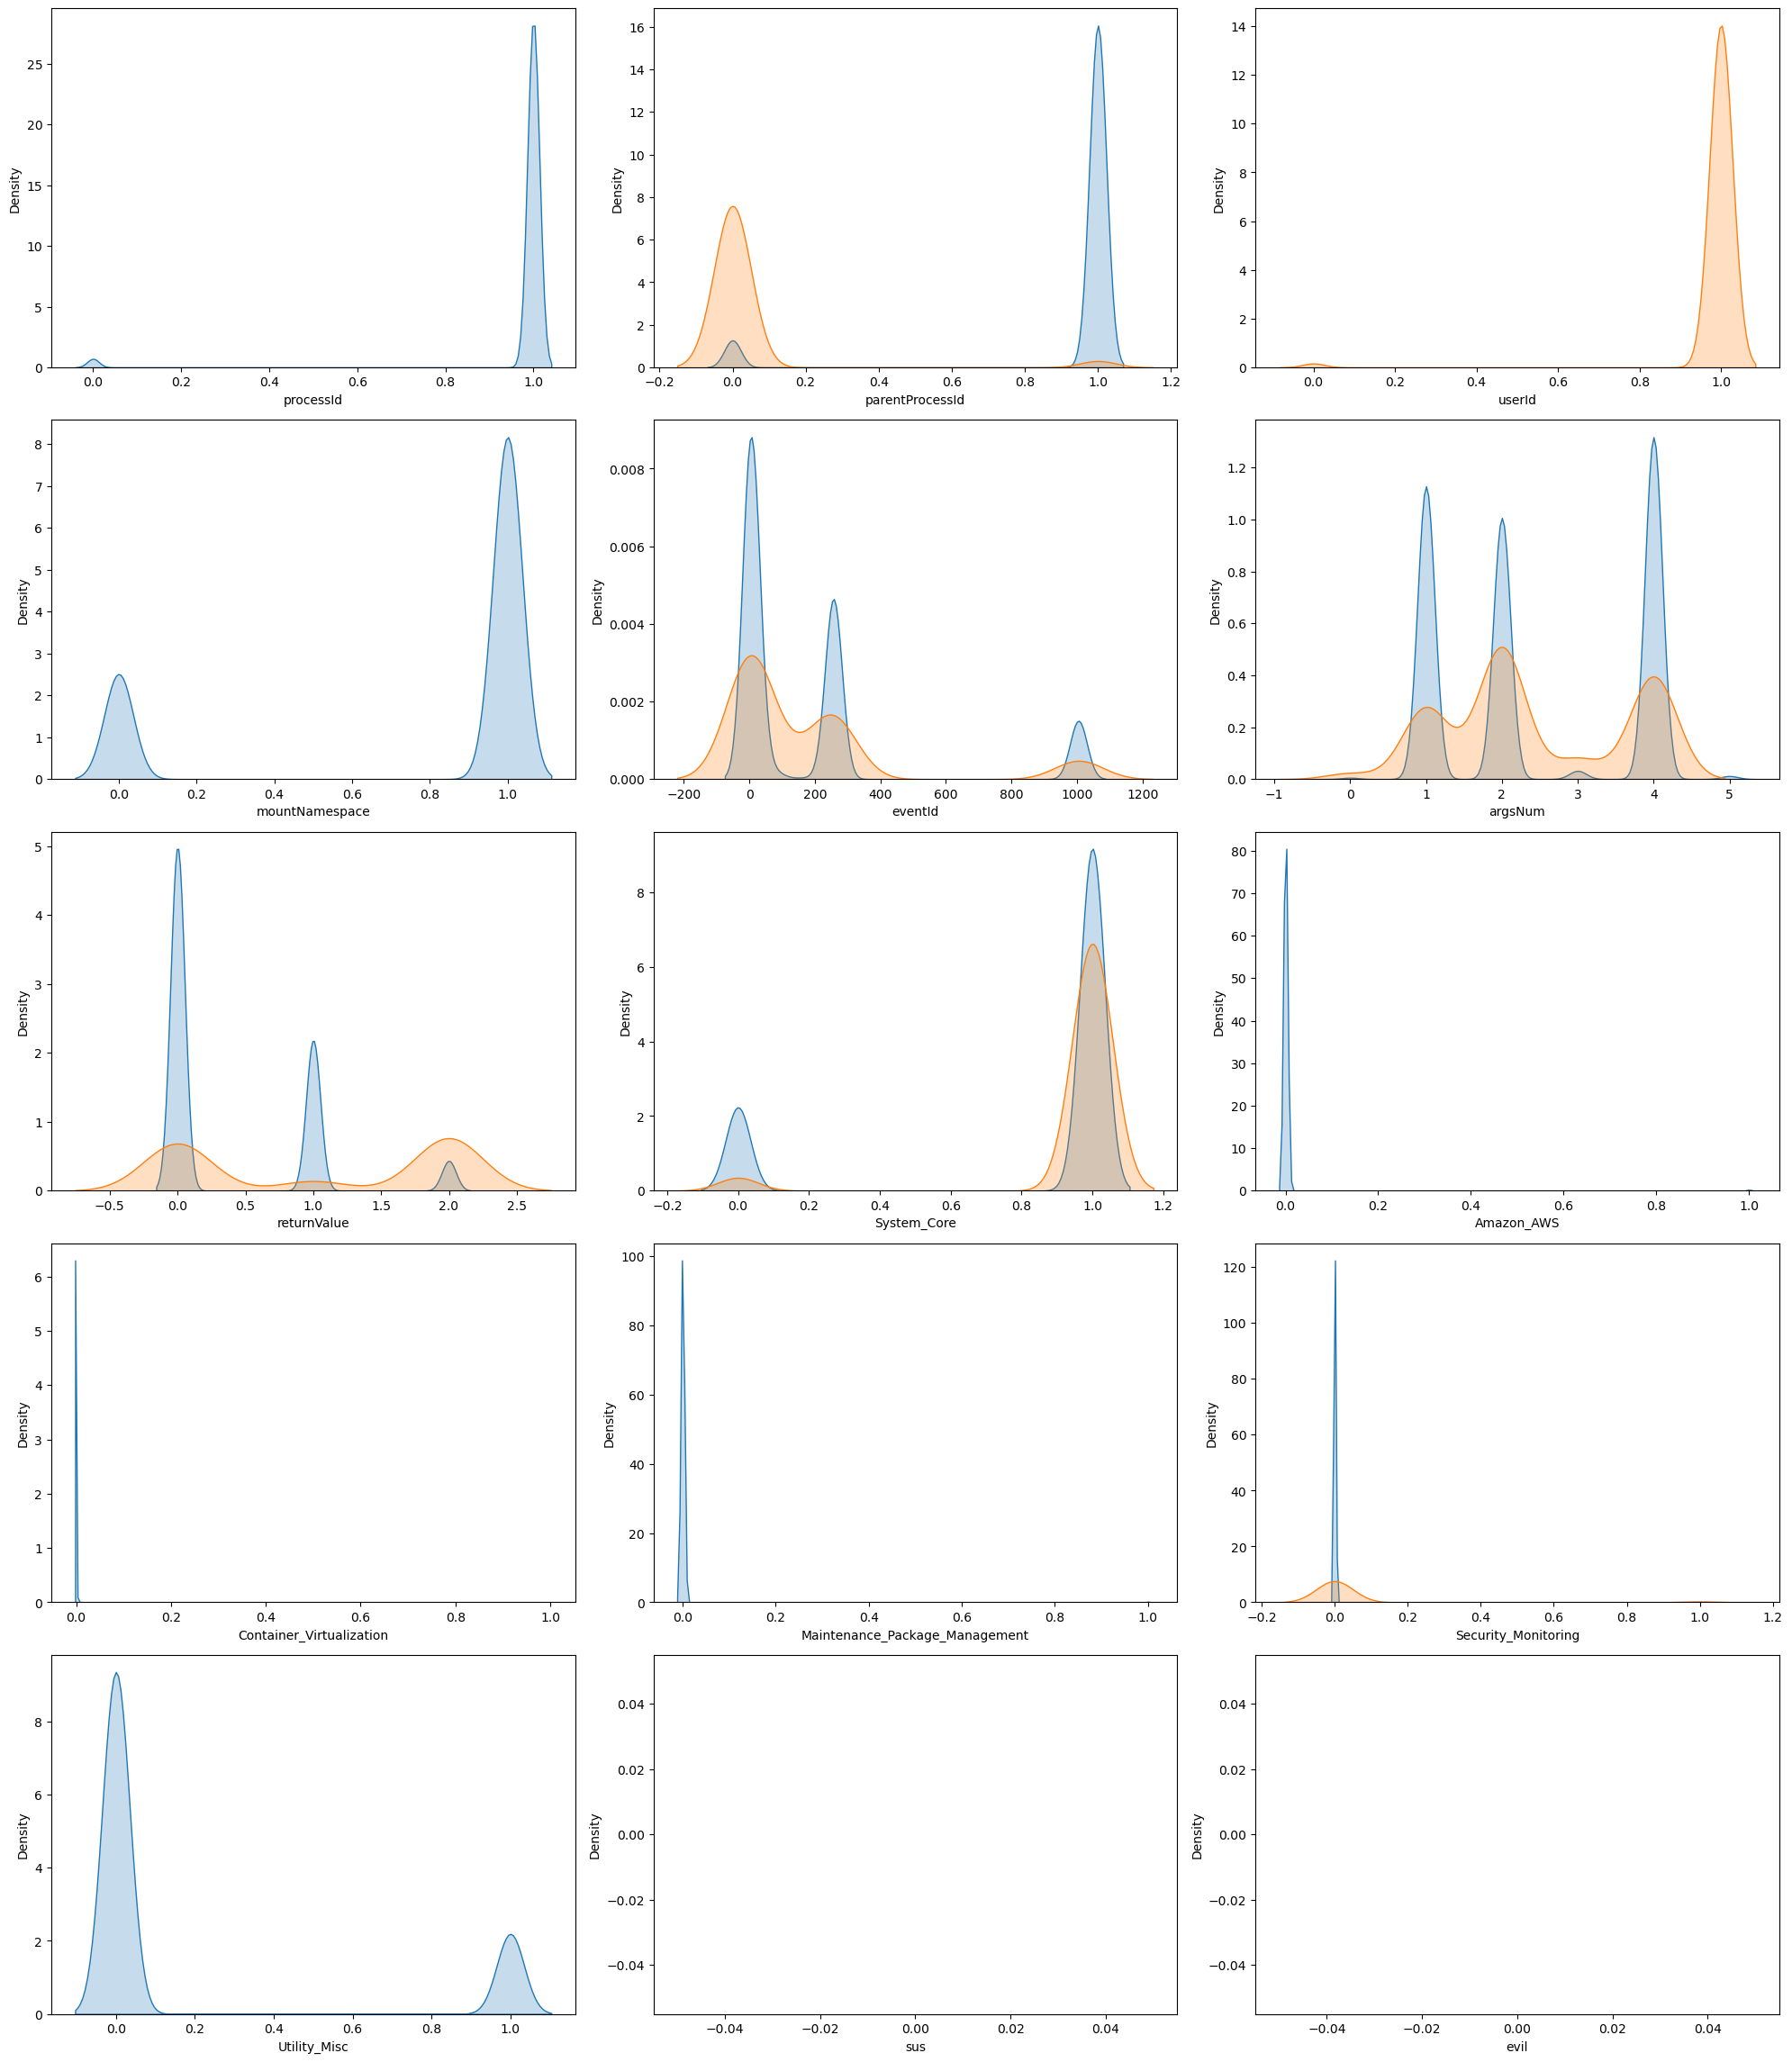

In [40]:
features = validation_df.columns

plt.figure(figsize=(20,50))
num=1
for feature in features:
    plt.subplot(11,3,num)
    sns.kdeplot(benign_val[feature], shade= True)
    sns.kdeplot(evil_val[feature], shade= True)
    num=num+1
    plt.tight_layout()
plt.show()

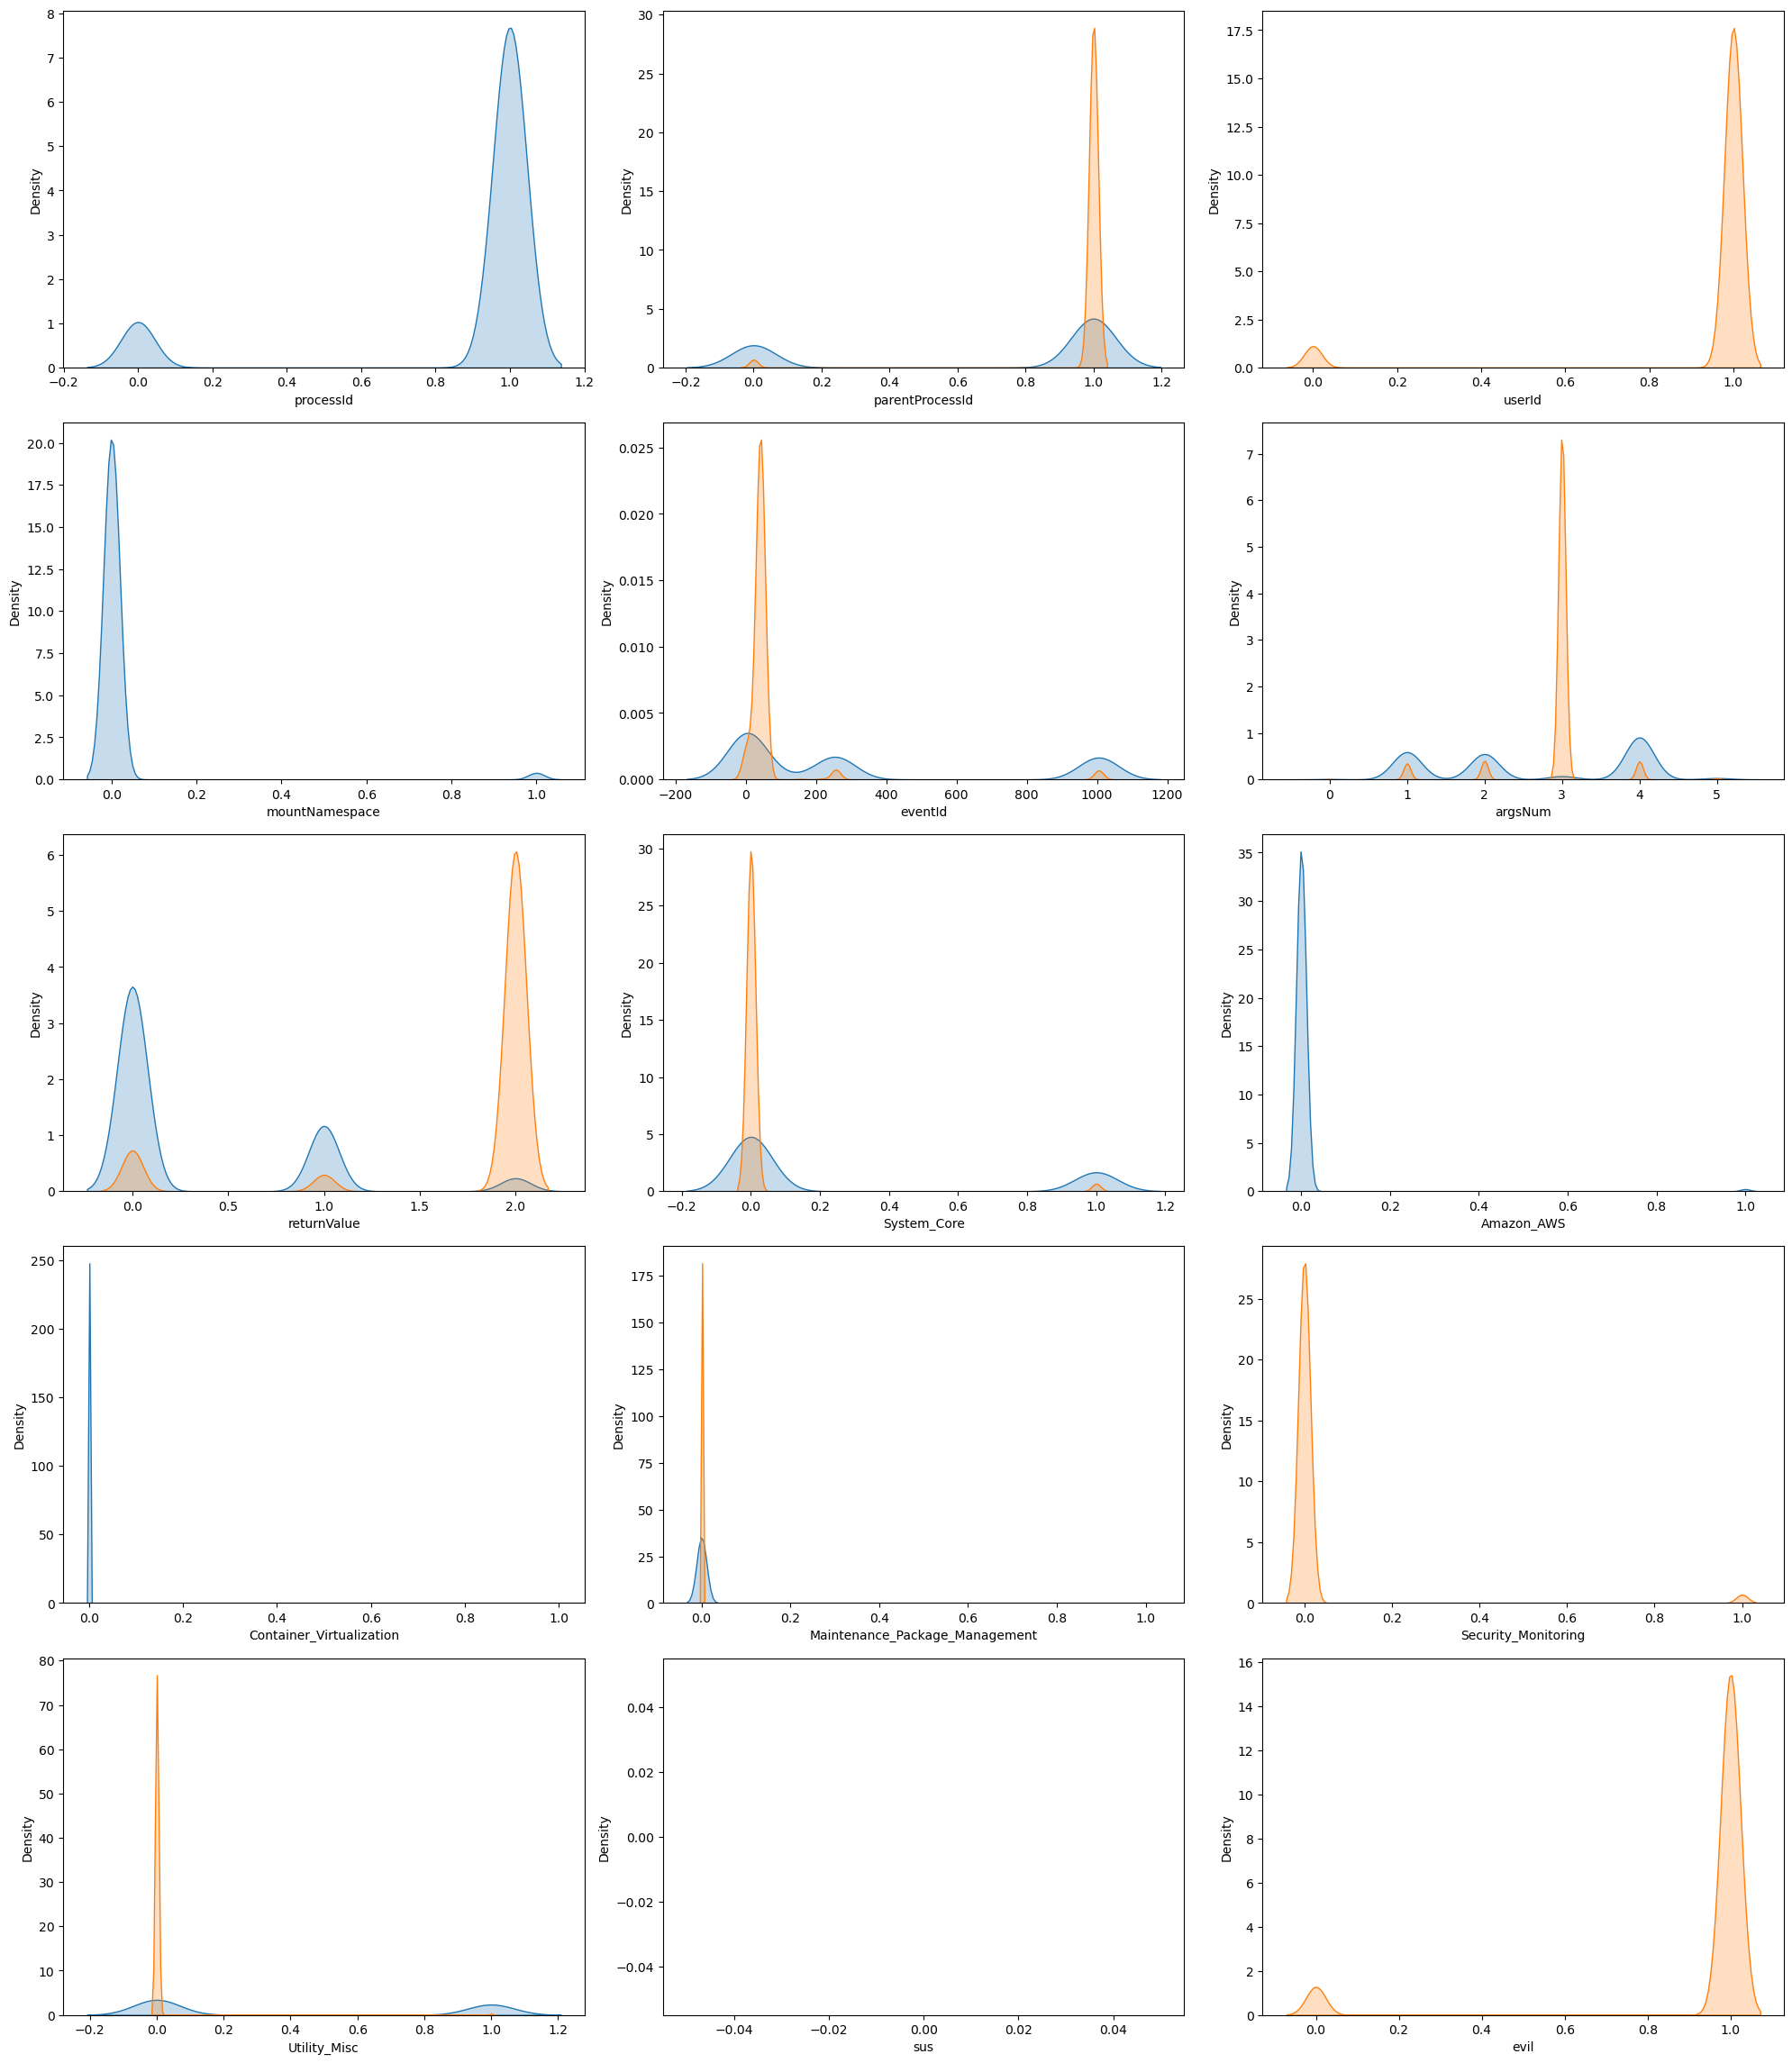

In [41]:
features = test_df.columns

plt.figure(figsize=(20,50))
num=1
for feature in features:
    plt.subplot(11,3,num)
    sns.kdeplot(benign_test[feature], shade= True)
    sns.kdeplot(evil_test[feature], shade= True)
    num=num+1
    plt.tight_layout()
plt.show()

Lets look at the frequency of our target features

<Axes: title={'center': 'Label Frequency for evil label in Train Dataset'}, xlabel='sus'>

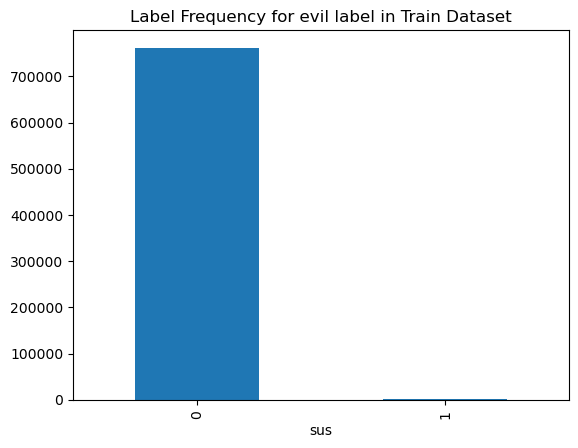

In [42]:
train_df.sus.value_counts().plot(kind='bar', title='Label Frequency for evil label in Train Dataset')

<Axes: title={'center': 'Label Frequency for evil label in val Dataset'}, xlabel='sus'>

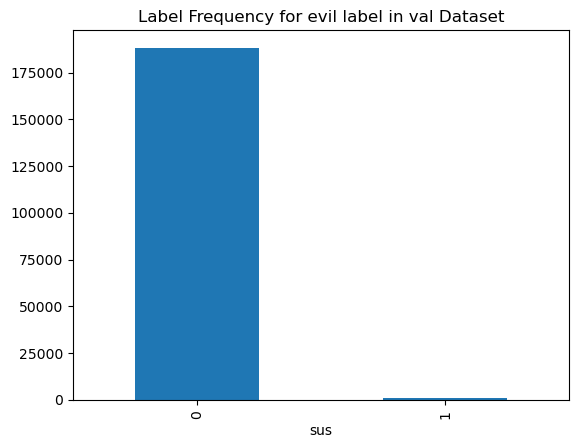

In [43]:
validation_df.sus.value_counts().plot(kind='bar', title='Label Frequency for evil label in val Dataset')

<Axes: title={'center': 'Label Frequency for evil label in test Dataset'}, xlabel='sus'>

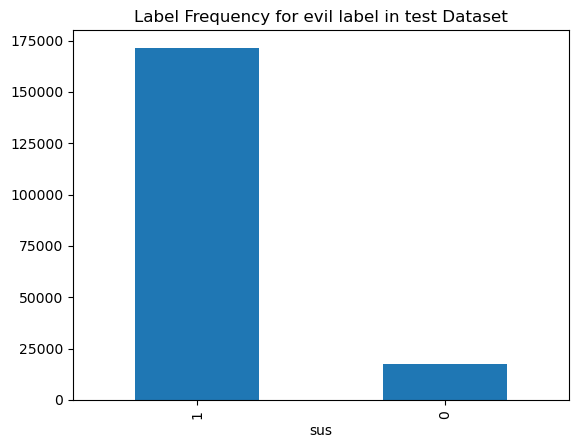

In [44]:
test_df.sus.value_counts().plot(kind='bar', title='Label Frequency for evil label in test Dataset')

In [45]:
train_df.groupby(['sus'])[['returnValue']].count()

,returnValue
sus,
0,761875
1,1269


In [46]:
test_df.groupby(['sus'])[['returnValue']].count()

,returnValue
sus,
0,17508
1,171459


In [47]:
validation_df.groupby(['sus'])[['returnValue']].count()

,returnValue
sus,
0,188181
1,786


### Feature correlation within the datasets

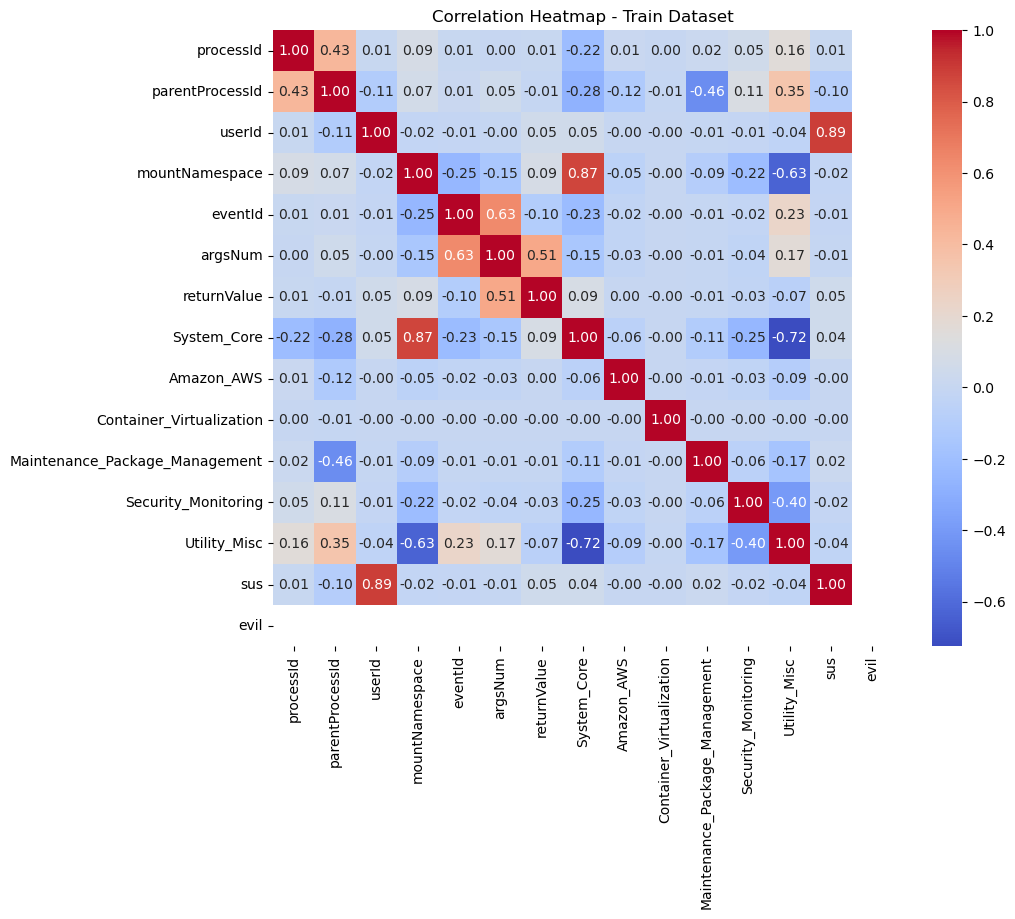

In [48]:
numerical_data_train = train_df.select_dtypes(include=['number'])
corr_train = numerical_data_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Train Dataset')
plt.show()


In [49]:
highest_correlation_train = corr_train.unstack().sort_values(ascending=False)
highest_correlation_train = highest_correlation_train[highest_correlation_train != 1.0].drop_duplicates()
print("Highest correlation values in the train dataset:")
print(highest_correlation_train.head(20))


Highest correlation values in the train dataset:
sus                  userId                 0.885770
System_Core          mountNamespace         0.869969
argsNum              eventId                0.631485
returnValue          argsNum                0.507900
processId            parentProcessId        0.433302
Utility_Misc         parentProcessId        0.348187
eventId              Utility_Misc           0.231675
Utility_Misc         argsNum                0.169440
                     processId              0.158653
Security_Monitoring  parentProcessId        0.109744
System_Core          returnValue            0.094163
mountNamespace       returnValue            0.088407
processId            mountNamespace         0.086792
parentProcessId      mountNamespace         0.067091
processId            Security_Monitoring    0.054648
System_Core          userId                 0.053562
userId               returnValue            0.051784
parentProcessId      argsNum                0.0481

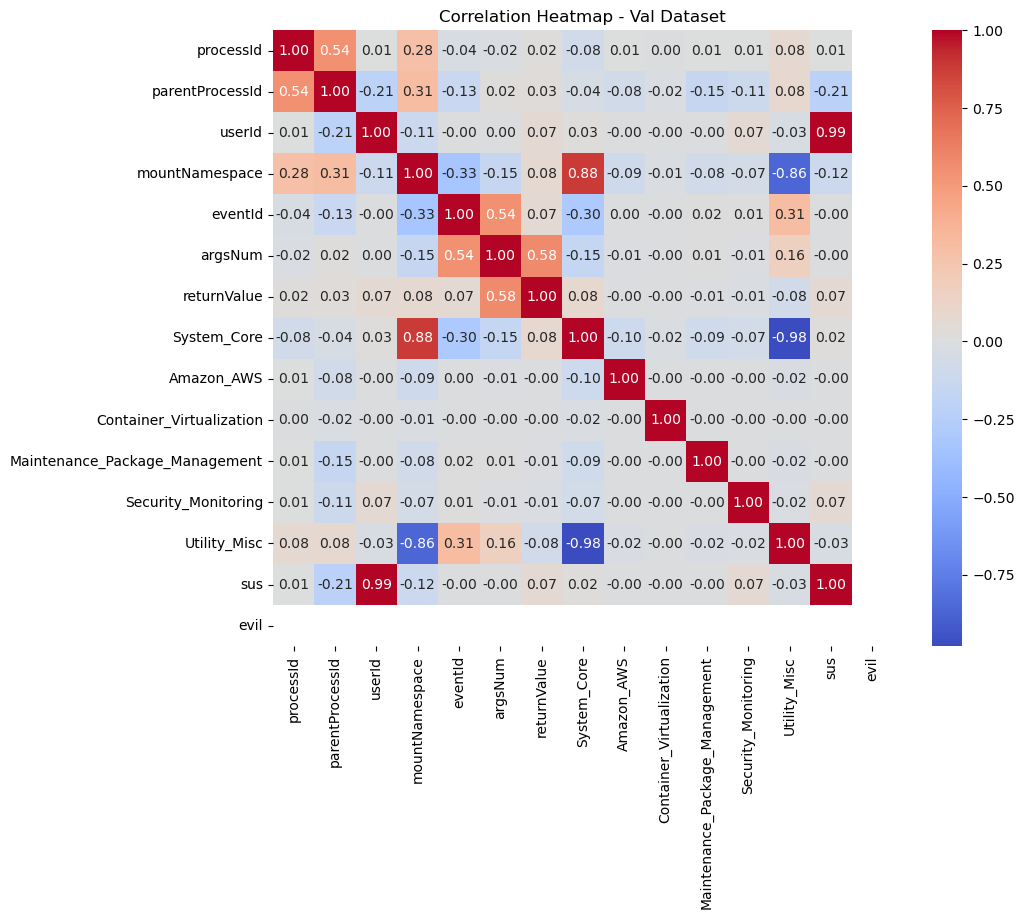

In [50]:
numerical_data_val = validation_df.select_dtypes(include=['number'])
corr_val = numerical_data_val.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_val, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Val Dataset')
plt.show()


In [51]:
highest_correlation_val = corr_val.unstack().sort_values(ascending=False)
highest_correlation_val = highest_correlation_val[highest_correlation_val != 1.0].drop_duplicates()
print("Highest correlation values in the test dataset:")
print(highest_correlation_val.head(20))


Highest correlation values in the test dataset:
sus             userId                 0.994235
mountNamespace  System_Core            0.881264
argsNum         returnValue            0.579772
                eventId                0.544303
processId       parentProcessId        0.544231
mountNamespace  parentProcessId        0.311114
eventId         Utility_Misc           0.306119
processId       mountNamespace         0.281689
Utility_Misc    argsNum                0.157668
System_Core     returnValue            0.083102
Utility_Misc    parentProcessId        0.082422
mountNamespace  returnValue            0.077014
processId       Utility_Misc           0.075996
userId          returnValue            0.070666
sus             returnValue            0.069762
returnValue     eventId                0.068078
userId          Security_Monitoring    0.065634
sus             Security_Monitoring    0.065232
returnValue     parentProcessId        0.028907
userId          System_Core            0

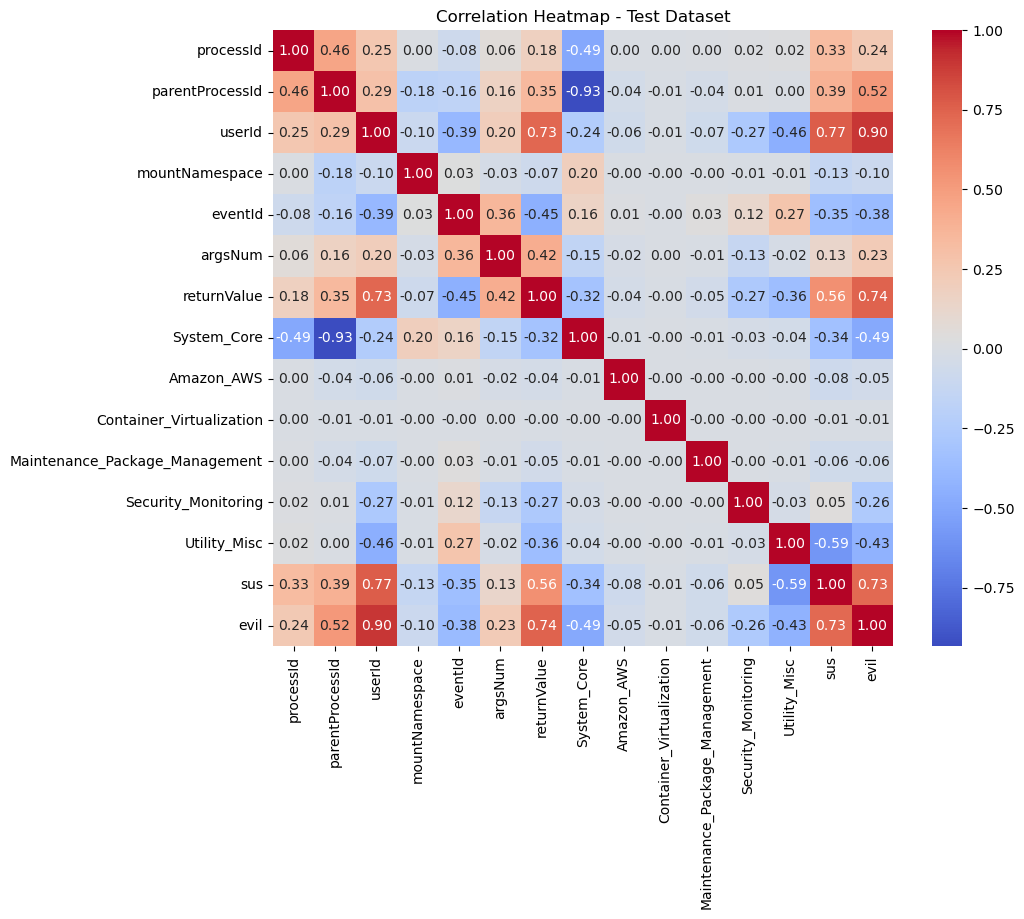

In [52]:
numerical_data_test = test_df.select_dtypes(include=['number'])
corr_test = numerical_data_test.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_test, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Test Dataset')
plt.show()


In [53]:
highest_correlation_test = corr_test.unstack().sort_values(ascending=False)
highest_correlation_test = highest_correlation_test[highest_correlation_test != 1.0].drop_duplicates()
print("Highest correlation values in the test dataset:")
print(highest_correlation_test.head(20))


Highest correlation values in the test dataset:
evil             userId             0.898151
userId           sus                0.770769
evil             returnValue        0.744488
returnValue      userId             0.730780
sus              evil               0.727881
returnValue      sus                0.556168
evil             parentProcessId    0.518626
parentProcessId  processId          0.461163
returnValue      argsNum            0.417135
sus              parentProcessId    0.388182
eventId          argsNum            0.364773
returnValue      parentProcessId    0.348721
sus              processId          0.329341
userId           parentProcessId    0.293362
Utility_Misc     eventId            0.270643
userId           processId          0.253846
evil             processId          0.239721
argsNum          evil               0.229034
                 userId             0.202778
mountNamespace   System_Core        0.196215
dtype: float64


Entropy Analysis

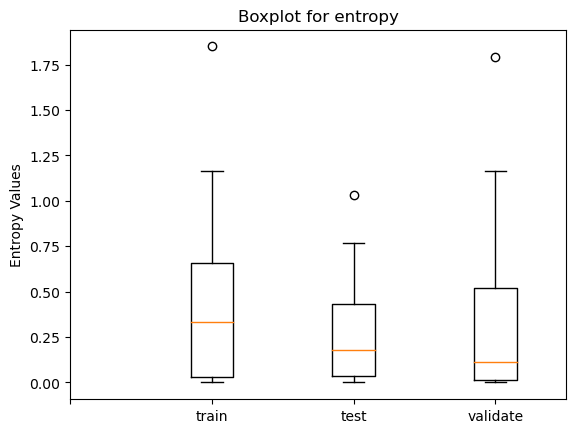

In [54]:
dataset = [train_df, test_df, validation_df]
entropy_vals = []
for data in dataset:
    dataset_entropy_vals = []
    for featureX in data.columns:
        if featureX == 'timestamp':
            pass
        else:
            counts = data[featureX].value_counts()
            feat_entropy = stats.entropy(counts)
            dataset_entropy_vals.append(feat_entropy)
            
    entropy_vals.append(dataset_entropy_vals)

plt.boxplot(entropy_vals)
plt.title('Boxplot for entropy')
plt.ylabel("Entropy Values")
plt.xticks([0,1,2,3],labels=['','train', 'test', 'validate'])
plt.show()

Variation

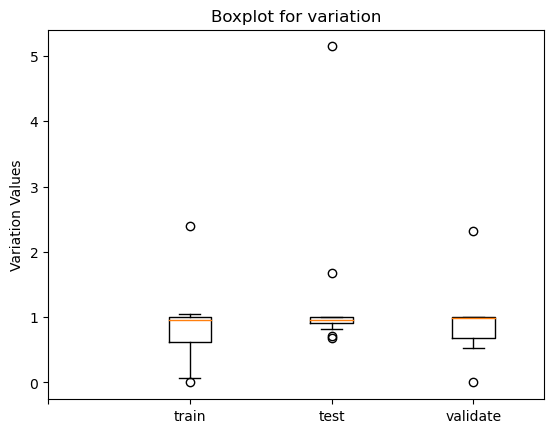

In [55]:
dataset = [train_df, test_df, validation_df]
variation_vals = []
for data in dataset:
    dataset_var_vals = []
    for featureX in data.columns:
        if featureX == 'timestamp':
            pass
        else:
            counts = data[featureX].value_counts()
            feat_var = stats.variation(counts)
            dataset_var_vals.append(feat_var)
            
    variation_vals.append(dataset_var_vals)

plt.boxplot(variation_vals)
plt.title('Boxplot for variation')
plt.ylabel("Variation Values")
plt.xticks([0,1,2,3],labels=['','train', 'test', 'validate'])
plt.show()